# SUMÁRIO DO PROJETO



- Link para a base de dados: https://www.kaggle.com/datasets/gcenachi/case-data-master-2024

1. Qual o contexto da problemática? O que queremos resolver?
  - Uma empresa de streaming de música adota uma abordagem reativa para reter clientes que não renovam a assinatura, oferecendo 3 meses gratuitos. No entanto, identificou-se que essa abordagem pode ser menos eficaz do que uma ação proativa, que antecipa o comportamento dos clientes. O objetivo é criar um modelo preditivo para identificar clientes com alta probabilidade de churn (cancelamento) nos próximos 3 meses após a data de observação. A definição de churn utilizada considera clientes que:
      - Possuem uma assinatura ativa no período de análise (data da safra);
      - Não renovaram ou não estão mais ativos nos 3 meses subsequentes.
  - O problema abordado, portanto, é o CHURN, com o foco em antecipar e evitar a saída de clientes.

2. Quais DADOS temos para trabalhar na solução?
  - Foi disponibilizado 3 tabelas:
      - Members: Dados demográficos e informações de cadastro dos clientes, como idade, gênero, data de registro e meio pelo qual se registraram.
      - Transactions: Informações sobre planos, pagamentos, cancelamentos e renovações de assinaturas, incluindo preços e datas de vencimento.
      - User Logs: Dados comportamentais e de uso, como o número de músicas ouvidas (por diferentes durações) e o total de segundos ouvidos.

3. Como chegar na solução e quais métodos/tecnologias podem apoiar e quais não podem? (justificação dos usos, questões de negócio, performance, processamento computacional, recursos e implantação em uma hipotética produtização)
  - Dada a escala dos dados, pensando na escalabilidade, performance, produtização e organização, optou-se por ferramentas capazes de lidar com processamento distribuido. Foi feita a ingestão dos dados dentro de um data lake criado no Google Drive, com a estrutura organizada em camadas Raw, Bronze, Silver e Gold, permitindo ingestão e transformações sistemáticas dos dados. Para isso, será usado o PySpark e suas bibliotecas e o Google Colab que se conecta com o Drive para realização do EDA, ETL e treinamento dos modelos.

4. Ótica de negócios: Ganhos $$
  - Após o estudo finalizado, deve-se levar em consideração que 50% dos clientes identificados como Churn no periodo analisado foram retidos e permaneceram ativos pelos proximos 12 meses. Desses 12 meses, entende-se pelo enunciado que, 3 meses serão os da ação de meses gratuitos, e os outros 9 serão pagos pelo cliente. Com isso, é possivel calcular o Retorno sobre o Investimento (ROI), que é dado por:

  $$
  \text{ROI} = \frac{\text{Ganho Gerado Pela Ação} - \text{Custo da ação}}{\text{Custo da ação}}
  $$

  - Assim através das colunas de valores dos planos de assinatura dos clientes, da para calcular o custo deles nos 3 meses gratuitos fornecidos (Custo da Ação) e o ganho dos outros 9 meses que ele irá pagar (Ganho Gerado Pela Ação). Esses resultados permitirão medir o impacto financeiro e a viabilidade da estratégia.

5. Segmentação dos clientes com uma abordagem não supervisionada
  - Após definido os churns e não churns, segmenta-los usando modelos de clusterização a fim de aprofundar a compreensão das características dos clientes  


para considerar no desenvolvimento:

1- EDA
- hipoteses voltadas ao problema e para a modelagem
- implicações das análises
- usar o EDA para tomada de decisões

2- Dataprep + feature engeneering + feature selection
- criação do publico-alvo, target, análise de volumetrias, missing, outliers, etc.
- construção de novas features / transformação de features
- feature selection adequado, variaveis significativas para o problema

3- Modelagem
- Estrutura do modelo utilizado, funcionamento, hiperparametros, vantagens e fraquezas
- Modelagem e pipe line adequados ao problema? eu entendo isso?
- Compreendo os impactos ao utilizar outras tecnicas de modelagem e pipeline construidos?

4- Validação
- Validação adequada? (Leakage, overfit, underfit, tamanho da amostra)
- Formas de validação exploradas? (cross-validation, train test split, out of sample, out of time, etc)
- Como as alterações do problema impactam na validação escolhida?

5- Definição e avaliação dos resultados
- Métricas de avaliação adequadas? (MAE, RMSE, Recall, AUC, Silhueta, etc)
- Como outras métricas impactariam os resultados do case?
- Como mudanças na estrutura do problema impactariam diferentes métricas?

6- Qualidade do código
- Organização e boas praticas do codigo (nomes intuitivos, comentários, ordenamento intuitivo)
- Codigo padronizado? (classes, funções e variaveis com nomes padronizados, clean code, pep8, etc?)
- Código visa a implementação? (modularização, tempo de processamento, versionamento etc?)

7- Soft Skills
- Sucinto e dentro do tempo indicado
- Clareza nas explicações
- Apresentação estruturada (começo, meio e fim)




# Instalação do ambiente inicial



Conectando com o Google Drive (armazenamento)

Instalação do Java

Instalação do Apache Spark

Configuração do Spark


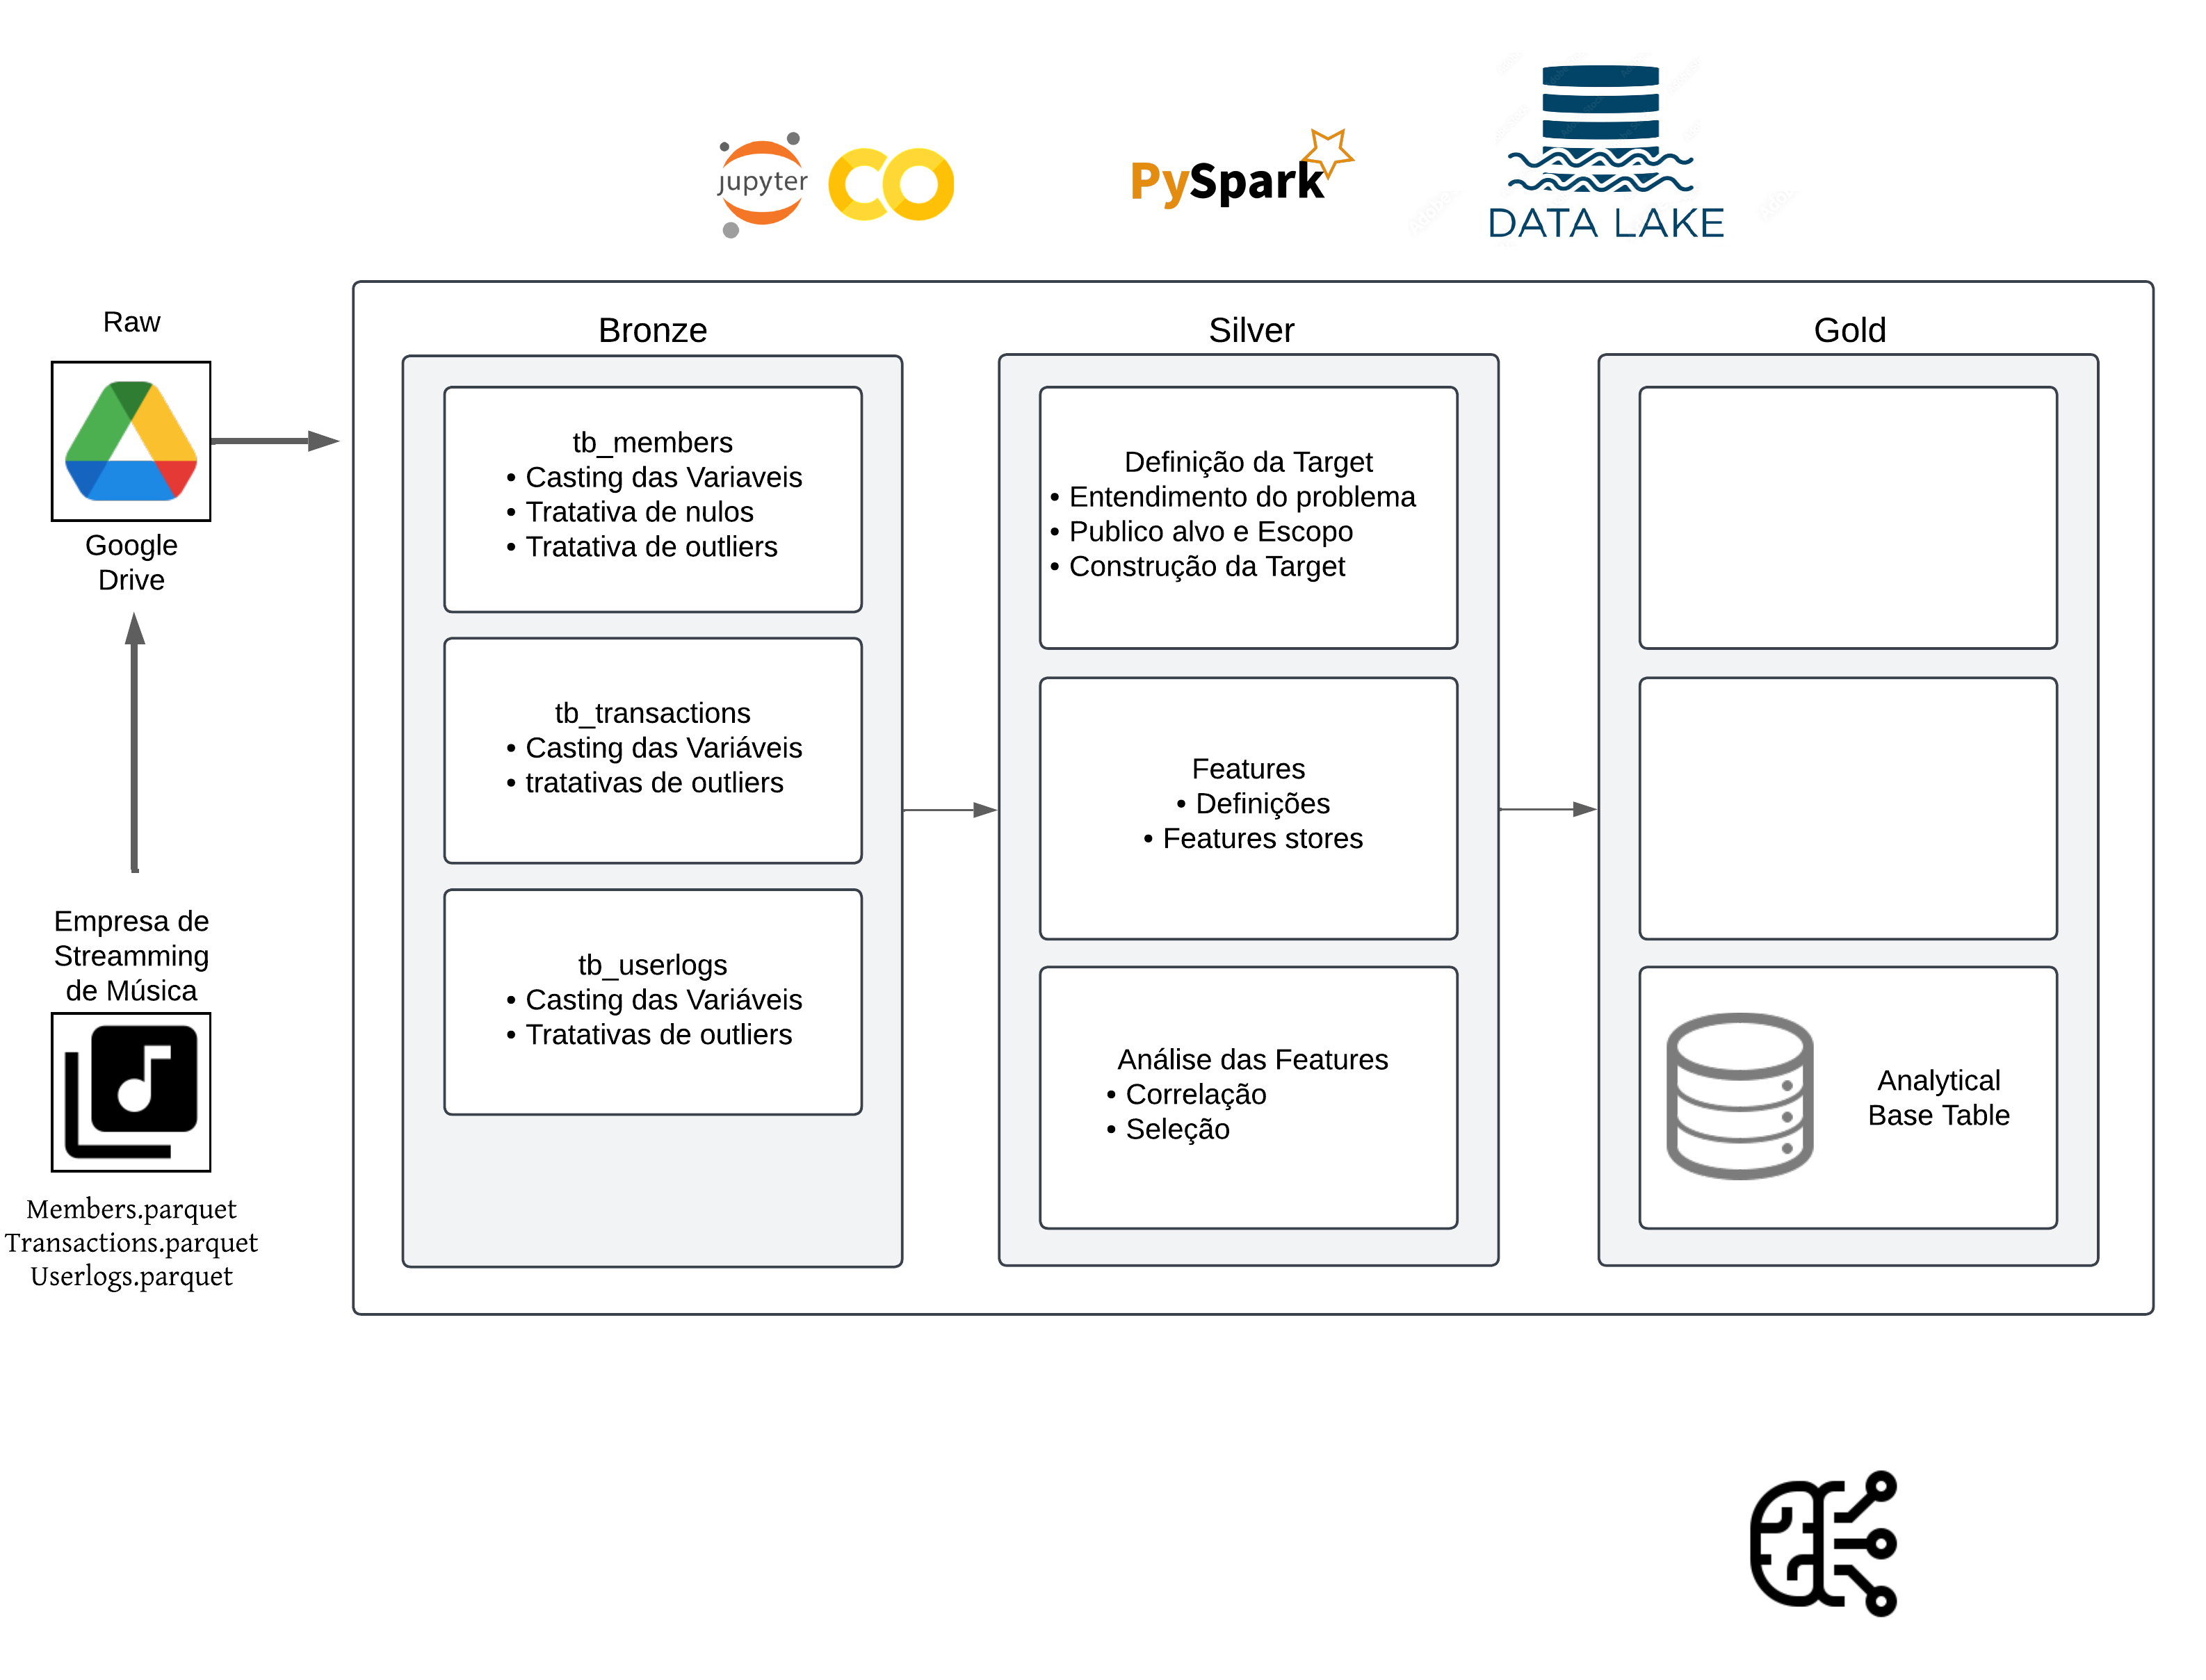

## Conectando com o ambiente de armazenamento dos dados, Google Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Baixando e instalando o Java e o Spark

O Java pois o Spark precisa de um ambiente JVM para ser executado, por ser escrito em Scala.

E o Spark 3.4.4, compativel com o python do ambiente do google colab (3.10.12)

In [2]:
!python --version

Python 3.10.12


In [3]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark

## Configurando o Spark

Configuração das variaveis ambiente

In [4]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"

# tornar o pyspark "importável"
import findspark # localizar o Spark no seu sistema e adicionar o PySpark ao sys.path, tornando-o importável dentro do ambiente Python do Google Colab.
findspark.init() # inicia a busca pela instalação do Spark com base nas variáveis de ambiente e adiciona o PySpark ao sys.path

# iniciar uma sessão local
from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .appName("Case_dataMaster_Victor") \
                    .config("spark.executor.memory", "6g") \
                    .config("spark.driver.memory", "4g") \
                    .config("spark.executor.cores", "2") \
                    .config("spark.driver.maxResultSize", "4g") \
                    .getOrCreate()

     #  # Memória do executor
     # Memória do driver
     # Número de núcleos
     # Tamanho máximo do resultado

# Importando os dados da RAW

Dados baixados e localizados no google drive para nao tem repetição em acessar o ambiente do kaggle e baixar os dados de la

In [5]:
path_members = '/content/drive/MyDrive/Colab Notebooks/data_master_VICTOR/data_lake/raw/members.parquet'
path_transactions = '/content/drive/MyDrive/Colab Notebooks/data_master_VICTOR/data_lake/raw/transactions.parquet'
path_userlogs = '/content/drive/MyDrive/Colab Notebooks/data_master_VICTOR/data_lake/raw/user_logs.parquet'

df_members = (spark.read
                   .format("parquet")
                   .option("header", True)
                   .option("inferSchema", True)
                   .load(path_members))

df_transactions = (spark.read
                   .format("parquet")
                   .option("header", True)
                   .option("inferSchema", True)
                   .load(path_transactions))

df_userlogs = (spark.read
                   .format("parquet")
                   .option("header", True)
                   .option("inferSchema", True)
                   .load(path_userlogs))

## Trazendo para uma view temporaria para consultas SQL

In [6]:
df_members.createOrReplaceTempView('tb_members')
df_transactions.createOrReplaceTempView('tb_transactions')
df_userlogs.createOrReplaceTempView('tb_userlogs')

# Importando bibliotecas e funções necessárias para a exploração

In [7]:
from pyspark.sql.functions import col, countDistinct, count, min, max, when, to_date, year, mean, stddev, concat, lit

from pyspark.sql.types import *
from pyspark.sql.functions import *

# import select functions and types
from pyspark.sql.types import IntegerType, StringType
from pyspark.sql.functions import floor, round

# Inicio de EDA na camada RAW (Exploratory Data and Analysis)



## Dicionario de dados INICIAL

### 1. Transactions:
  - Colunas:
    - 1º 'mnso': id do usuário;
    - 2º 'payment_method_id': Método de pagamento;
    - 3º 'payment_plan_days': tamanho do plano em DIAS;
    - 4º 'plan_list_price': preço do respectivo plano em New Taiwan Dollar (NTD);
    - 5º 'actual_amount_paid': Total pago atual (nao entendi);
    - 6º 'is_auto_renew': Renovação automatica 1 ou 0;
    - 7º 'transaction_date': data da transação no formato %Y %M %D;
    - 8º 'membership_expire_date': quando o plano vence no formato %Y %M %D;
    - 9º 'is_cancel': se nessa transação o cliente cancelou ou não o plano;
    - 10º 'safra': data (Data foto da base).

### 2. User_logs:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'safra': formato %Y %M %D (data foto da base);
    - 3º 'num_25': quantidade de músicas tocadas menos de 25% da duração dela;
    - 4º 'num_50': quantidade de músicas tocadas entre 25% e 50% da duração dela;
    - 5º 'num_75': quantidade de músicas tocadas entre 50% e 75% da duração dela;
    - 6º 'num_985': quantidade de músicas tocadas entre 75% e 98,5% da duração dela;
    - 7º 'num_100': quantidade de músicas tocadas acima de 98,5%;
    - 8º 'num_unq': quantidade de musicas tocadas apenas 1 vez;
    - 9º 'total_secs': total de segundos tocados.

### 3. Members:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'city': cidade do usuário?
    - 3º 'bd': idade? obs: outliers em 2015
    - 4º 'gender': gênero
    - 5º 'registered_via': meio de registro do cliente
    - 6º 'registration_init_time': primeiro regristo do cliente formato %Y %M %D
    - 7º 'safra': Data da foto da base
    - 8º 'is_ativo': se o cliente esta ativo ou não

## Entendendo o formato dos dados

In [ ]:
table = ['tb_members', 'tb_transactions', 'tb_userlogs']

for i in table:
  print(f'--------Tabela: {i}-------------------------')
  qnt_linhas = spark.sql(f'SELECT count(*) AS quantidade_linhas from {i}').collect()[0]['quantidade_linhas']
  df = spark.sql(f"SELECT * from {i}")
  qnt_colunas = len(df.columns)
  print(f"Formato da {i}: ", qnt_colunas, " X ", qnt_linhas )
  spark.sql(f'Describe {i}').show()

--------Tabela: tb_members-------------------------
Formato da tb_members:  8  X  63867246
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                msno|   string|   null|
|               safra|   string|   null|
|registration_init...|   string|   null|
|                city|   string|   null|
|                  bd|   string|   null|
|              gender|   string|   null|
|      registered_via|   string|   null|
|            is_ativo|      int|   null|
+--------------------+---------+-------+

--------Tabela: tb_transactions-------------------------
Formato da tb_transactions:  10  X  20712225
+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|                msno|   string|   null|
|   payment_method_id|   string|   null|
|   payment_plan_days|   string|   null|
|     plan_list_price|   string|   null|
|  actual_amount_paid|   st

## 1 - Entendendo a Members

### Primeira visão

In [ ]:
spark.sql('select * from tb_members LIMIT 10').show()

+--------------------+------+----------------------+----+---+------+--------------+--------+
|                msno| safra|registration_init_time|city| bd|gender|registered_via|is_ativo|
+--------------------+------+----------------------+----+---+------+--------------+--------+
|+++snpr7pmobhLKUg...|201612|              20140927|   1|  0|  null|             7|       1|
|++/AwGzubug3gT6J+...|201607|              20150322|   1|  0|  null|             9|       0|
|++/Gw1B9K+XOlB3hL...|201601|              20121217|  15| 32|  male|             3|       1|
|++02XbtviomSxcIBU...|201603|              20131112|  14| 21|  male|             7|       0|
|++0O0Bq04sB/9ZcOS...|201610|              20141021|   5| 33|  male|             3|       0|
|++2AQgVgYUAqJDw68...|201608|              20150416|  18| 23|  male|             3|       0|
|++2gRJ7i2MbO6qUG6...|201608|              20140616|  11| 33|  male|             7|       0|
|++3brN43Yd6GURegT...|201604|              20100512|  14| 19|  male|  

Nas primeiras 10 linhas ja vemos a idade = 0, e valores nulos no genero

### Min e Max de datas das colunas de datas para ver até onde vão

convertendo os tipos de dados, pois algumas consultas estavam vindo erradas

In [ ]:
df_members = (df_members
              .withColumn('safra', col('safra').cast('int'))
              .withColumn('registration_init_time', to_date(col('registration_init_time'), 'yyyyMMdd'))
              .withColumn('bd', col('bd').cast('int'))
              .withColumn('registered_via', col('registered_via').cast('int'))
              .withColumn('is_ativo', col('is_ativo').cast('boolean'))
              )
df_members.createOrReplaceTempView('tb_members')

(spark.sql(
    """
    select min(registration_init_time), max(registration_init_time),
           min(safra), max(safra)
    from tb_members
    """
  ).show()
)

+---------------------------+---------------------------+----------+----------+
|min(registration_init_time)|max(registration_init_time)|min(safra)|max(safra)|
+---------------------------+---------------------------+----------+----------+
|                 2004-03-26|                 2016-12-31|    201601|    201612|
+---------------------------+---------------------------+----------+----------+



Temos clientes que foram registrados 2016-12-31, e clientes antigos 2004.

Temos uma base de usuarios de referente ao ano (safra) de 2016. fotos dos clientes foram tiradas a cada mês, total de 12 fotos (possiveis features stores)

### Entendendo a quantidade de usuarios por safra e repetição de Clientes

In [35]:
(spark.sql(
    """
      select safra,
             count(msno) as qnt_msno,
             count(distinct msno) as qnt_distinct_msno,
             case when qnt_msno = qnt_distinct_msno then 1 else 0 end as check_colunas
      from tb_members
      group by 1
      order by 1 asc
    """
  ).show()
)

+------+--------+-----------------+-------------+
| safra|qnt_msno|qnt_distinct_msno|check_colunas|
+------+--------+-----------------+-------------+
|201601| 4294184|          4294184|            1|
|201602| 4502354|          4502354|            1|
|201603| 4697972|          4697972|            1|
|201604| 4876301|          4876301|            1|
|201605| 5060705|          5060705|            1|
|201606| 5250064|          5250064|            1|
|201607| 5439337|          5439337|            1|
|201608| 5615921|          5615921|            1|
|201609| 5778986|          5778986|            1|
|201610| 5949288|          5949288|            1|
|201611| 6114345|          6114345|            1|
|201612| 6287789|          6287789|            1|
+------+--------+-----------------+-------------+



In [39]:
(spark.sql(
    """
      select safra,
             count(msno) as qnt_msno,
             count(distinct msno) as qnt_distinct_msno,
             sum(case when is_ativo = 1 then 1 else 0 end) as qnt_ativos,
             sum(case when is_ativo = 0 then 1 else 0 end) as qnt_nao_ativos,
             case when qnt_msno = qnt_distinct_msno then 1 else 0 end as check_colunas
      from tb_members
      where registration_init_time like '201602%'
      group by 1
      order by 1 asc
    """
  ).show()
)

+------+--------+-----------------+----------+--------------+-------------+
| safra|qnt_msno|qnt_distinct_msno|qnt_ativos|qnt_nao_ativos|check_colunas|
+------+--------+-----------------+----------+--------------+-------------+
|201602|  208170|           208170|     30831|        177339|            1|
|201603|  208170|           208170|     31351|        176819|            1|
|201604|  208170|           208170|     26138|        182032|            1|
|201605|  208170|           208170|     26342|        181828|            1|
|201606|  208170|           208170|     25097|        183073|            1|
|201607|  208170|           208170|     28118|        180052|            1|
|201608|  208170|           208170|     27926|        180244|            1|
|201609|  208170|           208170|     27943|        180227|            1|
|201610|  208170|           208170|     29268|        178902|            1|
|201611|  208170|           208170|     30617|        177553|            1|
|201612|  20

Vendo que a quantidade de ids distintos por safra, é igual a quantidade total de registros por safra, ou seja, clientes nao se repetem dentro de cada safra

A cada safra não há clientes duplicados, só se repetem por safra, ou seja, no máximo 12 vezes

A quantidade de clientes por safra nunca diminui, logo a tabela members deve conter todos os usuarios que um dia ja passou pelo sistema.

A quantidade que entra, são todos assinantes? todos como is_ativo = 1?

A diferença de quantidade de clientes da safra 201602 para a 201201 é de 208.170 clientes. Dos 208 mil, poucos entram na base de dados como ativos, ou seja, da para entrar no sistema mas nao ser assinante? Da para ouvir musica mesmo nao sendo assinante?

E pela flutuação das quantidades de ativos ao decorrer do tempo, os mesmos clientes parecem nao estar mais ativo e voltar a ser ativo depois. Pode ocorrer de clientes que começam no sistema só assinam depois.

In [36]:
(spark.sql(
    """
    WITH contagem_msno as
    (
      select msno,
             count(msno) AS quantidade
      from tb_members
      group by 1
    )
    select min(quantidade) as minimo,
           max(quantidade) as maximo
    from contagem_msno
    """
    ).show()
)

+------+------+
|minimo|maximo|
+------+------+
|     1|    12|
+------+------+



confirmado. Max de repetição 12 e minimo 1 na base geral.

temos 12 safras de registro, por isso max de 12 repetições e no minimo 1 para clientes que só apareceram 1 vez e possivelmente cancelaram sua assinatura.

### Entendendo a quantidade de ativos e não ativos por safra

In [ ]:
(spark.sql(
    """
    WITH contagem_total as (
      select safra,
             count(msno) AS quantidade
      from tb_members
      group by 1
      order by 1
    ),
      contagem_ativos as(
      select safra,
             count(is_ativo) AS quantidade
      from tb_members
      where is_ativo = 1
      group by 1
      order by 1
    ),
      contagem_nao_ativos as(
      select safra,
             count(is_ativo) AS quantidade
      from tb_members
      where is_ativo = 0
      group by 1
      order by 1
    ),
    join as (
      select contagem_total.safra,
            contagem_ativos.quantidade AS quantidade_ativos,
            contagem_nao_ativos.quantidade AS quantidade_nao_ativos,
            contagem_total.quantidade AS quantidade_total
      from contagem_total
      join contagem_ativos
      on contagem_total.safra = contagem_ativos.safra
      join contagem_nao_ativos
      on contagem_ativos.safra = contagem_nao_ativos.safra
      order by 1
    )
    select (*),
           CONCAT(ROUND((quantidade_ativos / quantidade_total) * 100, 1), '%') as taxa_ativos,
           CONCAT(ROUND((quantidade_nao_ativos / quantidade_total) * 100, 1), '%') as taxa_nao_ativos
    from join
    """
    ).show()
)

+------+-----------------+---------------------+----------------+-----------+---------------+
| safra|quantidade_ativos|quantidade_nao_ativos|quantidade_total|taxa_ativos|taxa_nao_ativos|
+------+-----------------+---------------------+----------------+-----------+---------------+
|201601|           888663|              3405521|         4294184|      20.7%|          79.3%|
|201602|           918116|              3584238|         4502354|      20.4%|          79.6%|
|201603|           871651|              3826321|         4697972|      18.6%|          81.4%|
|201604|           831565|              4044736|         4876301|      17.1%|          82.9%|
|201605|           849653|              4211052|         5060705|      16.8%|          83.2%|
|201606|           844884|              4405180|         5250064|      16.1%|          83.9%|
|201607|           967936|              4471401|         5439337|      17.8%|          82.2%|
|201608|           980643|              4635278|         561

Maior parte dos clientes por safra são não ativos.

### Vendo se há valores missing

In [ ]:
# repetindo o codigo a cima em sql agora

(spark.sql(
    """
      SELECT
        SUM(CASE WHEN msno IS NULL THEN 1 ELSE 0 END) AS msno,
        SUM(CASE WHEN safra IS NULL THEN 1 ELSE 0 END) AS safra,
        SUM(CASE WHEN registration_init_time IS NULL THEN 1 ELSE 0 END) AS registration_init_time,
        SUM(CASE WHEN city IS NULL THEN 1 ELSE 0 END) AS city,
        SUM(CASE WHEN bd IS NULL THEN 1 ELSE 0 END) AS bd,
        SUM(CASE WHEN gender IS NULL THEN 1 ELSE 0 END) AS gender,
        SUM(CASE WHEN registered_via IS NULL THEN 1 ELSE 0 END) AS registered_via,
        SUM(CASE WHEN is_ativo IS NULL THEN 1 ELSE 0 END) AS is_ativo
      FROM tb_members
    """
  ).show()
)

+----+-----+----------------------+----+---+--------+--------------+--------+
|msno|safra|registration_init_time|city| bd|  gender|registered_via|is_ativo|
+----+-----+----------------------+----+---+--------+--------------+--------+
|   0|    0|                     0|   0|  0|38210177|             0|       0|
+----+-----+----------------------+----+---+--------+--------------+--------+



38 milhoes de registros vazios da coluna de genero, de um total de 63 milhoes

Ver como esta a distribuição dos valores validos dos generos

In [ ]:
(spark.sql(
    """
      SELECT gender,
             count(*)
      FROM tb_members
      group by 1
    """
  ).show()
)

+------+--------+
|gender|count(1)|
+------+--------+
|  null|38210177|
|female|12581644|
|  male|13075425|
+------+--------+



maior parte homens, mas dada a proporção esta quase balanceado.

### Entendendo os valores de cada coluna da Members

In [ ]:
def executa_query_member_por_coluna(coluna):
  query = f"""
            select count(distinct {coluna}) as quantidade_distinta_{coluna}
            from tb_members
           """
  spark.sql(query).show()

for i in df_members.columns:
    print(i)
    executa_query_member_por_coluna(i)

msno
+------------------------+
|quantidade_distinta_msno|
+------------------------+
|                 6287789|
+------------------------+

safra
+-------------------------+
|quantidade_distinta_safra|
+-------------------------+
|                       12|
+-------------------------+

registration_init_time
+------------------------------------------+
|quantidade_distinta_registration_init_time|
+------------------------------------------+
|                                      4663|
+------------------------------------------+

city
+------------------------+
|quantidade_distinta_city|
+------------------------+
|                      21|
+------------------------+

bd
+----------------------+
|quantidade_distinta_bd|
+----------------------+
|                   385|
+----------------------+

gender
+--------------------------+
|quantidade_distinta_gender|
+--------------------------+
|                         2|
+--------------------------+

registered_via
+------------------------

###  Observações e Questionamentos

 - Clientes cadastrados a mais de 10 anos (4663 dias distintos)
 - 21 cidades, avaliar se tem correlação com Churn
 - 385 idades distintas? algo esta muito errado.
 - 2 generos e mais da metade missing (analisar como essa variavel pode se comportar para o modelo)
 - 17 tipos de jeitos de se registrar diferentes



### Avaliando as idades 'bd'

In [ ]:
df_members.select('bd').describe().show()

+-------+------------------+
|summary|                bd|
+-------+------------------+
|  count|          63867246|
|   mean|11.430160210759675|
| stddev|19.041318387984273|
|    min|             -7168|
|    max|              2016|
+-------+------------------+



In [ ]:
(spark.sql(
    """
      select min(bd) as minimo,
             max(bd) as maximo,
             percentile_approx(bd, 0.5) AS mediana
      from tb_members
    """
  ).show()
)

+------+------+-------+
|minimo|maximo|mediana|
+------+------+-------+
| -7168|  2016|      0|
+------+------+-------+



mediana igual a 0;

In [ ]:
(spark.sql(
    """
      select count(bd)
      from tb_members
      where bd = 0
    """
  ).show()
)

+---------+
|count(bd)|
+---------+
| 39509864|
+---------+



Justificando a mediana ser 0, mais da metade dos dados dados são iguais a zero, indicando uma possivel falha na captura dos dados, valores discrepantes, ou valores nulos.

#### Entendendo brevemente a distribuição dos dados

In [ ]:
(spark.sql(
    """
    SELECT
        safra,
        min(bd) AS minimo_per_safra,
        max(bd) AS maximo_per_safra,
        SUM(CASE WHEN bd IS NULL THEN 0 ELSE 1 END) AS bd_total,
        SUM(CASE WHEN bd <= 0 THEN 1 ELSE 0 END) AS bd_menor_que_0,
        SUM(CASE WHEN bd > 120 THEN 1 ELSE 0 END) AS bd_maior_que_120,
        SUM(CASE WHEN bd > 0 AND bd <= 120 THEN 1 ELSE 0 END) AS bd_entre_0_e_120,
        CONCAT(ROUND(((bd_menor_que_0 + bd_maior_que_120) / bd_total) * 100, 1), '%') as taxa_de_fora_da_idade,
        CONCAT(ROUND((bd_entre_0_e_120 / bd_total) * 100, 1), '%') as taxa_de_dentro_da_idade
    FROM tb_members
    group by 1
    order by 1 asc
    """
  ).show()
)

+------+----------------+----------------+--------+--------------+----------------+----------------+---------------------+-----------------------+
| safra|minimo_per_safra|maximo_per_safra|bd_total|bd_menor_que_0|bd_maior_que_120|bd_entre_0_e_120|taxa_de_fora_da_idade|taxa_de_dentro_da_idade|
+------+----------------+----------------+--------+--------------+----------------+----------------+---------------------+-----------------------+
|201601|           -7168|            2016| 4294184|       2397278|             330|         1896576|                55.8%|                  44.2%|
|201602|           -7168|            2016| 4502354|       2575982|             333|         1926039|                57.2%|                  42.8%|
|201603|           -7168|            2016| 4697972|       2745403|             339|         1952230|                58.4%|                  41.6%|
|201604|           -7168|            2016| 4876301|       2901081|             343|         1974877|                59

In [ ]:
(spark.sql(
    """
    SELECT
        SUM(CASE WHEN bd IS NULL THEN 0 ELSE 1 END) AS bd_total,
        SUM(CASE WHEN bd <= 0 THEN 1 ELSE 0 END) AS bd_menor_que_0,
        SUM(CASE WHEN bd > 0 and bd <= 12 THEN 1 ELSE 0 END) AS bd_menor_que_12,
        SUM(CASE WHEN bd >= 13 and bd <= 19 THEN 1 ELSE 0 END) AS bd_entre_13_e_19,
        SUM(CASE WHEN bd >= 20 and bd <= 30 THEN 1 ELSE 0 END) AS bd_entre_20_e_30,
        SUM(CASE WHEN bd >= 31 and bd <= 64 THEN 1 ELSE 0 END) AS bd_entre_31_e_64,
        SUM(CASE WHEN bd >= 65 and bd <= 122 THEN 1 ELSE 0 END) AS bd_entre_65_e_122,
        SUM(CASE WHEN bd > 122 THEN 1 ELSE 0 END) AS bd_maior_que_122,
        SUM(CASE WHEN bd > 0 AND bd <= 122 THEN 1 ELSE 0 END) AS bd_entre_0_e_122,
        CONCAT(ROUND(((bd_menor_que_0 + bd_maior_que_122) / bd_total) * 100, 1), '%') as taxa_de_fora_da_idade,
        CONCAT(ROUND((bd_entre_0_e_122 / bd_total) * 100, 1), '%') as taxa_de_dentro_da_idade
    FROM tb_members
    """
  ).show()
)

+--------+--------------+---------------+----------------+----------------+----------------+-----------------+----------------+----------------+---------------------+-----------------------+
|bd_total|bd_menor_que_0|bd_menor_que_12|bd_entre_13_e_19|bd_entre_20_e_30|bd_entre_31_e_64|bd_entre_65_e_122|bd_maior_que_122|bd_entre_0_e_122|taxa_de_fora_da_idade|taxa_de_dentro_da_idade|
+--------+--------------+---------------+----------------+----------------+----------------+-----------------+----------------+----------------+---------------------+-----------------------+
|63867246|      39512942|          14934|         3326654|        11589809|         9205006|           213813|            4088|        24350216|                61.9%|                  38.1%|
+--------+--------------+---------------+----------------+----------------+----------------+-----------------+----------------+----------------+---------------------+-----------------------+



In [ ]:
(spark.sql(
    """
    SELECT
        SUM(CASE WHEN bd = 0 THEN 1 ELSE 0 END) AS bd_0,
        SUM(CASE WHEN bd < 0 THEN 1 ELSE 0 END) AS bd_1,
        SUM(CASE WHEN bd > 0 THEN 1 ELSE 0 END) AS bd_2,
        count(bd) as total,
        (bd_0 + bd_1 + bd_2)/total as checagem
    FROM tb_members
    """
  ).show()
)

+--------+----+--------+--------+--------+
|    bd_0|bd_1|    bd_2|   total|checagem|
+--------+----+--------+--------+--------+
|39509864|3078|24354304|63867246|     1.0|
+--------+----+--------+--------+--------+



identificado uma grande quantidade de valores iguais a zero

#### Vendo a distribuição dos outliers por ano, para confirmar que estão concentrados no ano de 2015, como diz o enunciado

In [ ]:
df_year_members = df_members.withColumn('year', year(col('registration_init_time')))
df_year_members.createOrReplaceTempView('tb_members_year')

(spark.sql(
    """
    SELECT
        year,
        min(bd) AS minimo_per_year,
        max(bd) AS maximo_per_year,
        SUM(CASE WHEN bd IS NULL THEN 0 ELSE 1 END) AS bd_total,
        SUM(CASE WHEN bd <= 0 THEN 1 ELSE 0 END) AS bd_menor_que_0,
        SUM(CASE WHEN bd > 120 THEN 1 ELSE 0 END) AS bd_maior_que_120,
        SUM(CASE WHEN bd > 0 AND bd <= 120 THEN 1 ELSE 0 END) AS bd_entre_0_e_120,
        CONCAT(ROUND(((bd_menor_que_0 + bd_maior_que_120) / bd_total) * 100, 1), '%') as taxa_de_fora_da_idade,
        CONCAT(ROUND((bd_entre_0_e_120 / bd_total) * 100, 1), '%') as taxa_de_dentro_da_idade
    FROM tb_members_year
    group by 1
    order by 1 asc
    """
  ).show()
)

+----+---------------+---------------+--------+--------------+----------------+----------------+---------------------+-----------------------+
|year|minimo_per_year|maximo_per_year|bd_total|bd_menor_que_0|bd_maior_que_120|bd_entre_0_e_120|taxa_de_fora_da_idade|taxa_de_dentro_da_idade|
+----+---------------+---------------+--------+--------------+----------------+----------------+---------------------+-----------------------+
|2004|              0|            786|  314808|         77088|              12|          237708|                24.5%|                  75.5%|
|2005|              0|            237|  496188|         75480|              12|          420696|                15.2%|                  84.8%|
|2006|              0|            994|  647436|           732|              12|          646692|                 0.1%|                  99.9%|
|2007|          -3152|           1821| 1077960|           876|              24|         1077060|                 0.1%|                  99.9%|

os outliers, como foi sugerido no enunciado do problema estão não só em 2015, mas concentrados em outros anos tambem.

### Testando a Regra de Tukey pra identificar os outliers

In [ ]:
quartis = (spark.sql(
    """
      SELECT
          percentile_approx(bd, 0.25) AS q1,
          percentile_approx(bd, 0.75) AS q3
      FROM tb_members
    """
))

quartis.show()

q1 = quartis.collect()[0]['q1']
q3 = quartis.collect()[0]['q3']

iqr = q3 - q1

low_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'low_bound: {low_bound}, upper_bound: {upper_bound}')

+---+---+
| q1| q3|
+---+---+
|  0| 24|
+---+---+

low_bound: -36.0, upper_bound: 60.0


In [ ]:
(spark.sql(
    """
      SELECT
          count(bd) AS qtd
      FROM tb_members
      where bd between -36 and 0
    """
  ).show()
)

+--------+
|     qtd|
+--------+
|39510164|
+--------+



entendendo se há valores entre o 0 e -36 (low_bound). Segundo a regra de turkey, os zeros continuariam dentro dos limites dos dados, seriam considerados outliers somente valores abaixo de -36 e acima de 60

### Testando o Z-Score para identificação de outliers

In [ ]:
# Média e desvio padrão
stats = df_members.select(mean("bd").alias("mean"), stddev("bd").alias("stddev")).collect()[0]
mean_bd, stddev_bd = stats["mean"], stats["stddev"]

# Adicionando coluna Z-score
data = df_members.withColumn("z_score_bd", (col("bd") - mean_bd) / stddev_bd)

# Identificando outliers
data1 = data.filter((col("z_score_bd") > 3) | (col("z_score_bd") < -3))
data1.show()

# selecionar o minimo e maximo da coluna bd do data1
data1.select(min("bd"), max("bd")).show()

# Identificando os valores dentro da faixa
data2 = data.filter((col("z_score_bd") <= 3) & (col("z_score_bd") >= -3))
data2.show()

# selecionar o minimo e maximo da coluna bd do data2
data2.select(min("bd"), max("bd")).show()

+-------+-------+
|min(bd)|max(bd)|
+-------+-------+
|   -176|    994|
+-------+-------+

+-------+-------+
|min(bd)|max(bd)|
+-------+-------+
|    -10|      9|
+-------+-------+



### OutLiers identificados, Colunas com tipos diferentes identificados sendo necessário transformar para a bronze

Outliers na 'bd'. Possiveis soluções para os outliers: Exclusão, substituição. Decidir por meio de algo justificado o que será considerado como outliers para o tratamento da BD (regra de turkey ou a logica de que a pessoa no mundo mais velha teve 122 anos, e nao existe idade negativa?) Analisar a correlação de churn com a idade e ver sua importancia. Para o momento: alterações esperadas para a construção da bronze, agora apenas sinalizar idades invalidas e que precisam ser tratadas. Grande quantidaded e valores iguais a zero.

Entender melhor a coluna de data 'safra', o que ela realmente representa, usar ela ou usar a registred_init_time?

Documentar:
Quantos valores foram removidos ou corrigidos?
Que critérios foram usados para identificar os valores inválidos?
Qual o impacto de substituir ou excluir? A quantidade de substituição é grande ou pequena?

## 2 - Entendendo a Transaction

### Primeira visão

In [ ]:
spark.sql('select * from tb_transactions LIMIT 10').show()

+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+------+
|                msno|payment_method_id|payment_plan_days|plan_list_price|actual_amount_paid|is_auto_renew|transaction_date|membership_expire_date|is_cancel| safra|
+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+------+
|+++IZseRRiQS9aaSk...|               38|              410|           1788|              1788|            0|        20151121|              20170104|        0|201511|
|+++snpr7pmobhLKUg...|               41|               30|            149|               149|            1|        20150526|              20150626|        0|201505|
|+++snpr7pmobhLKUg...|               41|               30|            149|               149|            1|        20150926|              20151026|        0|201509|
|++/9R3sX3

Visto valores de plan_list_price iguais ao actual_amount_paid, para valores altos que é incomum. Para valores baixos é entendivel, pode ser o primeiro mes do cliente, mas valores como 1788 é questionavel.


### Entendendo os minimos e máximos das colunas de data

In [ ]:
df_transactions = (df_transactions.withColumn('payment_method_id', col('payment_method_id').cast('int'))
                                  .withColumn('payment_plan_days', col('payment_plan_days').cast('int'))
                                  .withColumn('plan_list_price', col('plan_list_price').cast('float'))
                                  .withColumn('actual_amount_paid', col('actual_amount_paid').cast('float'))
                                  .withColumn('is_auto_renew', col('is_auto_renew').cast('boolean'))
                                  .withColumn('transaction_date', to_date(col('transaction_date'), 'yyyyMMdd'))
                                  .withColumn('membership_expire_date', to_date(col('membership_expire_date'), 'yyyyMMdd'))
                                  .withColumn('is_cancel', col('is_cancel').cast('boolean'))
                                  .withColumn('safra', col('safra').cast('int'))
                                  )
df_transactions.createOrReplaceTempView('tb_transactions')

(spark.sql(
    """
    select min(transaction_date), max(transaction_date),
           min(membership_expire_date), max(membership_expire_date),
           min(safra), max(safra)
    from tb_transactions
    """
  ).show()
)

+---------------------+---------------------+---------------------------+---------------------------+----------+----------+
|min(transaction_date)|max(transaction_date)|min(membership_expire_date)|max(membership_expire_date)|min(safra)|max(safra)|
+---------------------+---------------------+---------------------------+---------------------------+----------+----------+
|           2015-01-01|           2017-02-28|                 1970-01-01|                 2017-03-31|    201501|    201702|
+---------------------+---------------------+---------------------------+---------------------------+----------+----------+



data de expirar o plano em 1970? o primeiro usuario registrado foi em 2004, antes disso pode se considerar uma anomalia.

In [ ]:
(spark.sql(
    """
    select count(*) as quantidade_linhas_antes_de_2004
    from tb_transactions
    where membership_expire_date < '2004-01-01'
    """
  ).show()
)

+-------------------------------+
|quantidade_linhas_antes_de_2004|
+-------------------------------+
|                           1501|
+-------------------------------+



### Entendendo cada coluna da Transaction

In [ ]:
def executa_query_transaction_por_coluna(coluna):
  query = f"""
            select count(distinct {coluna}) as quantidade_distinta_{coluna}
            from tb_transactions
           """
  spark.sql(query).show()

for i in df_transactions.columns:
    print(i)
    executa_query_transaction_por_coluna(i)

msno
+------------------------+
|quantidade_distinta_msno|
+------------------------+
|                 2363626|
+------------------------+

payment_method_id
+-------------------------------------+
|quantidade_distinta_payment_method_id|
+-------------------------------------+
|                                   40|
+-------------------------------------+

payment_plan_days
+-------------------------------------+
|quantidade_distinta_payment_plan_days|
+-------------------------------------+
|                                   37|
+-------------------------------------+

plan_list_price
+-----------------------------------+
|quantidade_distinta_plan_list_price|
+-----------------------------------+
|                                 51|
+-----------------------------------+

actual_amount_paid
+--------------------------------------+
|quantidade_distinta_actual_amount_paid|
+--------------------------------------+
|                                    57|
+------------------------------

- 40 meios de pagamento
- 37 tamanhos de planos diferentes, (qnt de dias acumulados ativos?)
- 26 safras (201501 a 201702)

### Entendendo os preços dos planos

In [ ]:
(spark.sql(
    """
    select min(plan_list_price), max(plan_list_price),
           min(actual_amount_paid), max(actual_amount_paid),
           SUM(CASE WHEN plan_list_price = actual_amount_paid THEN 1 ELSE 0 END) AS qnt_iguais
    from tb_transactions
    """
  ).show()
)

+--------------------+--------------------+-----------------------+-----------------------+----------+
|min(plan_list_price)|max(plan_list_price)|min(actual_amount_paid)|max(actual_amount_paid)|qnt_iguais|
+--------------------+--------------------+-----------------------+-----------------------+----------+
|                 0.0|              2000.0|                    0.0|                 2000.0|  19114847|
+--------------------+--------------------+-----------------------+-----------------------+----------+



In [ ]:
df_transactions.describe('plan_list_price', 'actual_amount_paid').show()

+-------+------------------+------------------+
|summary|   plan_list_price|actual_amount_paid|
+-------+------------------+------------------+
|  count|          20712225|          20712225|
|   mean|140.24088353617248|142.83468555406287|
| stddev|132.27679209056055|133.60944276809502|
|    min|               0.0|               0.0|
|    max|            2000.0|            2000.0|
+-------+------------------+------------------+



In [ ]:
# vendo quais sao os valores que mais se repetem na coluna plan_list_price e actual_amount_paid
(spark.sql(
    """
      select safra,
             plan_list_price,
             payment_plan_days
      from tb_transactions
      group by 1, 2, 3
      order by 1 desc
      limit 10
    """
  ).show()
)

(spark.sql(
    """
      select safra,
             actual_amount_paid,
             payment_plan_days
      from tb_transactions
      group by 1, 2, 3
      order by 1 desc
      limit 10
    """
  ).show()
)

+------+---------------+-----------------+
| safra|plan_list_price|payment_plan_days|
+------+---------------+-----------------+
|201702|            119|               30|
|201702|              0|              120|
|201702|              0|                3|
|201702|            180|               45|
|201702|             35|                7|
|201702|              0|                7|
|201702|            150|               30|
|201702|              0|              195|
|201702|             99|               30|
|201702|            100|               30|
+------+---------------+-----------------+

+------+------------------+-----------------+
| safra|actual_amount_paid|payment_plan_days|
+------+------------------+-----------------+
|201702|               119|               30|
|201702|                 0|              120|
|201702|                 0|                3|
|201702|               180|               45|
|201702|                35|                7|
|201702|                 0|  

In [ ]:
(spark.sql(
    """
      select safra,
             plan_list_price,
             payment_plan_days,
             count(plan_list_price) as qnt_plan_list_price
      from tb_transactions
      group by 1, 2, 3
      order by 4 desc
      limit 10
    """
  ).show()
)

+------+---------------+-----------------+-------------------+
| safra|plan_list_price|payment_plan_days|qnt_plan_list_price|
+------+---------------+-----------------+-------------------+
|201512|            149|               30|             596373|
|201511|            149|               30|             580714|
|201601|            149|               30|             555415|
|201508|            149|               30|             496022|
|201509|            149|               30|             486624|
|201608|            149|               30|             486141|
|201507|            149|               30|             484580|
|201609|            149|               30|             476899|
|201506|            149|               30|             470793|
|201607|            149|               30|             470265|
+------+---------------+-----------------+-------------------+



possiveis valores dos planos

- 180 -
- 150 -
- 149 -
- 129 -
- 119 -
- 100 -
- 99 -

### Vendo se há valores missing

In [ ]:
(spark.sql(
    """
      SELECT
        SUM(CASE WHEN msno IS NULL THEN 1 ELSE 0 END) AS msno,
        SUM(CASE WHEN payment_method_id IS NULL THEN 1 ELSE 0 END) AS payment_method_id,
        SUM(CASE WHEN payment_plan_days IS NULL THEN 1 ELSE 0 END) AS payment_plan_days,
        SUM(CASE WHEN plan_list_price IS NULL THEN 1 ELSE 0 END) AS plan_list_price,
        SUM(CASE WHEN actual_amount_paid IS NULL THEN 1 ELSE 0 END) AS actual_amount_paid,
        SUM(CASE WHEN is_auto_renew IS NULL THEN 1 ELSE 0 END) AS is_auto_renew,
        SUM(CASE WHEN transaction_date IS NULL THEN 1 ELSE 0 END) AS transaction_date,
        SUM(CASE WHEN membership_expire_date IS NULL THEN 1 ELSE 0 END) AS membership_expire_date,
        SUM(CASE WHEN is_cancel IS NULL THEN 1 ELSE 0 END) AS is_cancel,
        SUM(CASE WHEN safra IS NULL THEN 1 ELSE 0 END) AS safra
      FROM tb_transactions
    """
  ).show()
)

+----+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+-----+
|msno|payment_method_id|payment_plan_days|plan_list_price|actual_amount_paid|is_auto_renew|transaction_date|membership_expire_date|is_cancel|safra|
+----+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+-----+
|   0|                0|                0|              0|                 0|            0|               0|                     0|        0|    0|
+----+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+-----+



### Entendendo a quantidade de clientes por safra

In [ ]:
(spark.sql(
    """
      select safra,
             count(msno) as qnt_msno,
             count(distinct msno) as qnt_distinct_msno,
             case when qnt_msno = qnt_distinct_msno then 1 else 0 end as check_colunas
      from tb_transactions
      group by 1
      order by 4 asc
    """
  ).show()
)

+------+--------+-----------------+-------------+
| safra|qnt_msno|qnt_distinct_msno|check_colunas|
+------+--------+-----------------+-------------+
|201505|  571552|           571552|            1|
|201701|  988576|           988576|            1|
|201702|  885566|           885566|            1|
|201501|  548792|           548792|            1|
|201509|  714610|           714610|            1|
|201609|  982640|           982640|            1|
|201512|  861107|           861107|            1|
|201604|  774169|           774169|            1|
|201511|  820345|           820345|            1|
|201611| 1094941|          1094941|            1|
|201502|  545303|           545303|            1|
|201503|  626488|           626488|            1|
|201603|  775469|           775469|            1|
|201508|  705975|           705975|            1|
|201607|  924032|           924032|            1|
|201610| 1033898|          1033898|            1|
|201606|  804729|           804729|            1|


nao se repetem dentro de cada safra

### Observações e questionamentos

  - Data de vencimento do plano em 1970?
  - Transações de 201501 a 201702
  - 40 meios de pagamentos
  - Maior parte dos registros de preços dos planos, tanto Amount quanto por plano estão com valores iguais.
  - Tipos dos dados estão atrapalhando as consultas em cima dos dados
  - Coluna is_cancel: entender como ela pode ajudar no nosso contexto
  - Não há missing

## 3 - Entendendo a User_logs

### Primeira visão

In [ ]:
spark.sql('select * from tb_userlogs LIMIT 10').show()

+--------------------+------+------+------+------+-------+-------+-------+------------------+
|                msno| safra|num_25|num_50|num_75|num_985|num_100|num_unq|        total_secs|
+--------------------+------+------+------+------+-------+-------+-------+------------------+
|SwlrSivYHoKF9V5wm...|201701| 121.0|  28.0|  14.0|   29.0|  704.0|  827.0|        184606.903|
|rE5wSmHEF1Dhu55zh...|201605|  26.0|   2.0|   5.0|    6.0|  462.0|  256.0|        119439.485|
|hx+cyaQ/Jcdr/Z5fo...|201611| 161.0|  71.0|  49.0|   34.0|  668.0|  891.0|        204791.242|
|53QW6B70J23X2UCvx...|201502|  37.0|   9.0|   3.0|    9.0|  408.0|  447.0|        101186.041|
|/0S1N/oRyxGLZlzxn...|201506| 205.0|  49.0|  23.0|   21.0|  225.0|  489.0|         69957.524|
|qB/zteXKaOk3hzFCo...|201509|  52.0|  10.0|  10.0|   20.0|  308.0|  264.0|         81703.877|
|7btpXOqzA1ggOggSW...|201610| 159.0|  53.0|  30.0|   43.0| 1075.0|  881.0|305353.79099999997|
|kgEhriAqTydVKQ1xn...|201609|  88.0|  13.0|  14.0|   13.0|  

O tipo dos dados nessa tabela estão corretos, para construção da bronze nao sendo necessários essa alteração. Nenhuma anomalia observada de primeira vista.

### Vendo mins e maxs da colunan safra

In [ ]:
df_userlogs = (df_userlogs.withColumn('num_25', col('num_25').cast('float'))
                          .withColumn('num_50', col('num_50').cast('float'))
                          .withColumn('num_75', col('num_75').cast('float'))
                          .withColumn('num_985', col('num_985').cast('float'))
                          .withColumn('num_100', col('num_100').cast('float'))
                          .withColumn('num_unq', col('num_unq').cast('float'))
                          .withColumn('total_secs', col('total_secs').cast('float'))
              )
df_userlogs.createOrReplaceTempView('tb_userlogs')

In [ ]:
(spark.sql(
    """
      select min(safra), max(safra)
      from tb_userlogs
    """
  ).show()
)

+----------+----------+
|min(safra)|max(safra)|
+----------+----------+
|    201501|    201702|
+----------+----------+



### Entendendo cada coluna da User_logs

Aqui temos somente variaveis númericas, nenhuma categorica, nao tendo importância ver a distinção dos valores. por isso aqui farei somente o describe.

In [ ]:
df_userlogs.describe().show()

+-------+--------------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+--------------------+
|summary|                msno|            safra|           num_25|           num_50|            num_75|           num_985|          num_100|           num_unq|          total_secs|
+-------+--------------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+--------------------+
|  count|            26758971|         26758971|         26758971|         26758971|          26758971|          26758971|         26758971|          26758971|            26758971|
|   mean|                null|201572.0403868669|95.42601163549973|24.03566975725636|14.903521327483034|16.538671797207748|450.1598216538297|440.91930526775485|-2.11717488634742...|
| stddev|                null|61.87618074610147|175.2882595645691|39.12554591867812|  22.626721

total de segundos negativos?

### Entendento o total de segundos ouvidos

In [ ]:
(spark.sql(
    """
      select total_secs
      from tb_userlogs
      limit 10
    """
  ).show()
)

+----------+
|total_secs|
+----------+
|  184606.9|
|119439.484|
| 204791.23|
| 101186.04|
|  69957.52|
| 81703.875|
| 305353.78|
| 159511.73|
|  324691.0|
|  56296.34|
+----------+



padronizar 2 casas depois da virgula para melhorar a visualização

In [ ]:
(spark.sql(
    """
      select round(total_secs, 2)
      from tb_userlogs
      limit 10
    """
  ).show()
)

+--------------------+
|round(total_secs, 2)|
+--------------------+
|            184606.9|
|           119439.48|
|           204791.23|
|           101186.04|
|            69957.52|
|            81703.88|
|           305353.78|
|           159511.73|
|            324691.0|
|            56296.34|
+--------------------+



In [ ]:
(spark.sql(
    """
      select min(round(total_secs, 2)),
             max(round(total_secs, 2))
      from tb_userlogs
      limit 10
    """
  ).show()
)

+-------------------------+-------------------------+
|min(round(total_secs, 2))|max(round(total_secs, 2))|
+-------------------------+-------------------------+
|           -2.39807678E17|             9.2233725E15|
+-------------------------+-------------------------+



In [ ]:
#segudos para dias
valor = 9.2233725E15

dias = valor / (60*60*24)

print(dias, dias/365)

106751996527.77777 292471223.3637747


Não é possivel ouvir 106751996527 dias de musica, 292471223 anos, e nao existe valores de tempo negativos.

considerando que um ano comum tem 31.536.000 de segundos
vejamos quantos usuarios ouviram mais de um ano em segundos. Valor improvavel pois, segundo uma estatistica nao confirmada sobre o spotify no reddit, um usuario compartilhou que ouviu 116.262 minutos, que da 6.975.720 segundos.

In [ ]:
um_ano_em_segundos = 1 * 365 * 24 * 60 * 60 # Anos * Dias * Horas * Minutos * Segundos
print(um_ano_em_segundos)
# Contar quantos total_secs tem para baixo de zero, e acima do dez_anos_em_segundos

(spark.sql(
    """
      select count(total_secs) as negativos
      from tb_userlogs
      where total_secs < 0
    """
  ).show()
)

(spark.sql(
    f"""
      select count(total_secs) as acima_de_dez_anos
      from tb_userlogs
      where total_secs >= {um_ano_em_segundos}
    """
  ).show()
)

31536000
+---------+
|negativos|
+---------+
|    42346|
+---------+

+-----------------+
|acima_de_dez_anos|
+-----------------+
|              155|
+-----------------+



calcular os quartis para ver a quantidade de valores em cada quartil

In [ ]:
# pegando o 1, 2, 3 e 4 quartil da coluna total_Secs,e  vendo a quantidade por intervalos

(spark.sql(
    """
    WITH quartis AS (
        SELECT
            percentile_approx(total_secs, 0.25) AS q1,
            percentile_approx(total_secs, 0.5) AS q2,
            percentile_approx(total_secs, 0.75) AS q3,
            percentile_approx(total_secs, 1) AS q4
        FROM tb_userlogs
    )
    SELECT
        SUM(CASE WHEN total_secs < 0 THEN 1 ELSE 0 END) AS negativos,
        SUM(CASE WHEN total_secs >= 0 AND total_secs < (SELECT q1 FROM quartis) THEN 1 ELSE 0 END) AS faixa_0_q1,
        SUM(CASE WHEN total_secs >= (SELECT q1 FROM quartis) AND total_secs < (SELECT q2 FROM quartis) THEN 1 ELSE 0 END) AS faixa_q1_q2,
        SUM(CASE WHEN total_secs >= (SELECT q2 FROM quartis) AND total_secs < (SELECT q3 FROM quartis) THEN 1 ELSE 0 END) AS faixa_q2_q3,
        SUM(CASE WHEN total_secs >= (SELECT q3 FROM quartis) AND total_secs <= (SELECT q4 FROM quartis) THEN 1 ELSE 0 END) AS faixa_q3_q4
    FROM tb_userlogs
    """
  ).show()
)


+---------+----------+-----------+-----------+-----------+
|negativos|faixa_0_q1|faixa_q1_q2|faixa_q2_q3|faixa_q3_q4|
+---------+----------+-----------+-----------+-----------+
|    42346|   6646952|    6689487|    6689509|    6690677|
+---------+----------+-----------+-----------+-----------+



### Aplicando a regra de Turkey para identificar os outliers

In [ ]:
quartis = (spark.sql(
    """
      SELECT
          percentile_approx(total_secs, 0.25) AS q1,
          percentile_approx(total_secs, 0.75) AS q3
      FROM tb_userlogs
    """
))

quartis.show()

q1 = quartis.collect()[0]['q1']
q3 = quartis.collect()[0]['q3']

iqr = q3 - q1

low_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'low_bound: {low_bound}, upper_bound: {upper_bound}')

+---------+---------+
|       q1|       q3|
+---------+---------+
|11021.553|152111.48|
+---------+---------+

low_bound: -200613.3447265625, upper_bound: 363746.3818359375


o low_bound tem que ser 0, nao há valores negativos para tempo. consideraremos valores acima do upper_bound e abaixo de 0 como outliers.

In [ ]:
# contar quantos outliers tem e quantos registros dentro da faixa esperada

(spark.sql(
    f"""
      select count(total_secs) as total,
             sum(case when total_secs < {low_bound} or total_secs > {upper_bound} then 1 else 0 end) as qnt_outliers,
             sum(case when total_secs >= {low_bound} and total_secs <= {upper_bound} then 1 else 0 end) as qnt_dentro_da_faixa,
             CONCAT(ROUND((qnt_dentro_da_faixa / total) * 100, 1), '%') as taxa_dentro,
             CONCAT(ROUND((qnt_outliers / total) * 100, 1), '%') as taxa_de_outliers
      from tb_userlogs
    """
  ).show()
)

# mudando o low_bound para 0 e comparar
(spark.sql(
    f"""
      select count(total_secs) as total,
             sum(case when total_secs < 0 or total_secs > {upper_bound} then 1 else 0 end) as qnt_outliers,
             sum(case when total_secs >= 0 and total_secs <= {upper_bound} then 1 else 0 end) as qnt_dentro_da_faixa,
             CONCAT(ROUND((qnt_dentro_da_faixa / total) * 100, 1), '%') as taxa_dentro,
             CONCAT(ROUND((qnt_outliers / total) * 100, 1), '%') as taxa_de_outliers
      from tb_userlogs
    """
  ).show()
)


+--------+------------+-------------------+-----------+----------------+
|   total|qnt_outliers|qnt_dentro_da_faixa|taxa_dentro|taxa_de_outliers|
+--------+------------+-------------------+-----------+----------------+
|26758971|     1952284|           24806687|      92.7%|            7.3%|
+--------+------------+-------------------+-----------+----------------+

+--------+------------+-------------------+-----------+----------------+
|   total|qnt_outliers|qnt_dentro_da_faixa|taxa_dentro|taxa_de_outliers|
+--------+------------+-------------------+-----------+----------------+
|26758971|     1952284|           24806687|      92.7%|            7.3%|
+--------+------------+-------------------+-----------+----------------+



nao teve diferença usar o low_bound e usar o zero.

In [ ]:
(spark.sql(
    """
      select count(total_secs) as total_com_0
      from tb_userlogs
      where total_secs < 0
    """
  ).show()
)
(spark.sql(
    f"""
      select count(total_secs) as total_com_low_bound
      from tb_userlogs
      where total_secs < {low_bound}
    """
  ).show()
)

+-----------+
|total_com_0|
+-----------+
|      42346|
+-----------+

+-------------------+
|total_com_low_bound|
+-------------------+
|              42346|
+-------------------+



confirmando com a quantidade usando cada um.

### convertendo segundos para minutos para ver como as taxas e outliers para ver se melhora a interpretação dos numeros

In [ ]:
# converter a coluna total_secs de segundos para minutos 'total_min' para ficar mais interpretavel
quartis_min = (spark.sql(
    """
      with tb_total_min as (
        select total_secs / 60 as total_min
        from tb_userlogs
      )
      select percentile_approx(total_min, 0.25) AS q1,
             percentile_approx(total_min, 0.75) AS q3
      from tb_total_min
    """
  ))

quartis_min.show()

q1 = quartis_min.collect()[0]['q1']
q3 = quartis_min.collect()[0]['q3']

iqr_min = q3 - q1

low_bound_min = q1 - (1.5 * iqr_min)
upper_bound_min = q3 + (1.5 * iqr_min)

print(f'low_bound: {low_bound_min}, upper_bound: {upper_bound_min}')

+------------------+-------------+
|                q1|           q3|
+------------------+-------------+
|183.69254557291666|2535.19140625|
+------------------+-------------+

2351.4988606770835
-3343.5557454427085
6062.439697265625
low_bound: -3343.5557454427085, upper_bound: 6062.439697265625


In [ ]:
# contar quantos outliers tem e quantos registros dentro da faixa esperada

(spark.sql(
    f"""
      with tb_total_min as (
        select total_secs / 60 as total_min
        from tb_userlogs
      )
      select count(total_min) as total,
             sum(case when total_min < {low_bound_min} or total_min > {upper_bound_min} then 1 else 0 end) as qnt_outliers,
             sum(case when total_min >= {low_bound_min} and total_min <= {upper_bound_min} then 1 else 0 end) as qnt_dentro_da_faixa,
             CONCAT(ROUND((qnt_dentro_da_faixa / total) * 100, 1), '%') as taxa_dentro,
             CONCAT(ROUND((qnt_outliers / total) * 100, 1), '%') as taxa_de_outliers
      from tb_total_min
    """
  ).show()
)

# mudando o low_bound para 0 e comparar
(spark.sql(
    f"""
      with tb_total_min as (
        select total_secs / 60 as total_min
        from tb_userlogs
      )
      select count(total_min) as total,
             sum(case when total_min < 0 or total_min > {upper_bound_min} then 1 else 0 end) as qnt_outliers,
             sum(case when total_min >= 0 and total_min <= {upper_bound_min} then 1 else 0 end) as qnt_dentro_da_faixa,
             CONCAT(ROUND((qnt_dentro_da_faixa / total) * 100, 1), '%') as taxa_dentro,
             CONCAT(ROUND((qnt_outliers / total) * 100, 1), '%') as taxa_de_outliers
      from tb_total_min
    """
  ).show()
)


+--------+------------+-------------------+-----------+----------------+
|   total|qnt_outliers|qnt_dentro_da_faixa|taxa_dentro|taxa_de_outliers|
+--------+------------+-------------------+-----------+----------------+
|26758971|     1952284|           24806687|      92.7%|            7.3%|
+--------+------------+-------------------+-----------+----------------+

+--------+------------+-------------------+-----------+----------------+
|   total|qnt_outliers|qnt_dentro_da_faixa|taxa_dentro|taxa_de_outliers|
+--------+------------+-------------------+-----------+----------------+
|26758971|     1952284|           24806687|      92.7%|            7.3%|
+--------+------------+-------------------+-----------+----------------+



In [ ]:
(spark.sql(
    f"""
      with tb_total_min as (
        select total_secs / 60 as total_min
        from tb_userlogs
      )
      select count(total_min) as total_com_upper_bound
      from tb_total_min
      where total_min > {upper_bound_min}
    """
  ).show()
)

+-------------------+
|total_com_low_bound|
+-------------------+
|            1909938|
+-------------------+



In [ ]:
52284-9938 # valores menores que zero

42346

Vendo como a quantidade de outliers muda alterando o upper bound

In [ ]:
# continuar editando aqui

In [ ]:
for i in range(10000, 100001, 10000):
  (spark.sql(
      f"""
        with tb_total_min as (
          select total_secs / 60 as total_min
          from tb_userlogs
        )
        select count(total_min) as total_min_com_{i}_de_bound
        from tb_total_min
        where total_min > {i}
      """
    ).show()
  )

+----------------------------+
|total_min_com_10000_de_bound|
+----------------------------+
|                      720366|
+----------------------------+

+----------------------------+
|total_min_com_20000_de_bound|
+----------------------------+
|                       79777|
+----------------------------+

+----------------------------+
|total_min_com_30000_de_bound|
+----------------------------+
|                       13793|
+----------------------------+

+----------------------------+
|total_min_com_40000_de_bound|
+----------------------------+
|                        3960|
+----------------------------+

+----------------------------+
|total_min_com_50000_de_bound|
+----------------------------+
|                        1413|
+----------------------------+

+----------------------------+
|total_min_com_60000_de_bound|
+----------------------------+
|                        1168|
+----------------------------+

+----------------------------+
|total_min_com_70000_de_bound|
+-

#### Analisando em horas e dias ouvidos

In [ ]:
df_userlogs_total_secs_horas = df_userlogs_total_secs.withColumn('horas', col('total_secs') / 3600)
df_userlogs_total_secs_horas.select(min('horas'), max('horas')).show()
df_userlogs_total_secs_dias = df_userlogs_total_secs.withColumn('dias', col('total_secs') / 86400)
df_userlogs_total_secs_dias.select(min('dias'), max('dias')).show()

+--------------------+--------------------+
|          min(horas)|          max(horas)|
+--------------------+--------------------+
|-6.66132424881237...|2.562047788093220...|
+--------------------+--------------------+

+--------------------+--------------------+
|           min(dias)|           max(dias)|
+--------------------+--------------------+
|-2.77555177033848...|1.067519911705508...|
+--------------------+--------------------+



### Vendo se há valores missing

In [ ]:
(spark.sql(
    """
      SELECT
        SUM(CASE WHEN msno IS NULL THEN 1 ELSE 0 END) AS msno,
        SUM(CASE WHEN num_25 IS NULL THEN 1 ELSE 0 END) AS num_25,
        SUM(CASE WHEN num_50 IS NULL THEN 1 ELSE 0 END) AS num_50,
        SUM(CASE WHEN num_75 IS NULL THEN 1 ELSE 0 END) AS num_75,
        SUM(CASE WHEN num_985 IS NULL THEN 1 ELSE 0 END) AS num,
        SUM(CASE WHEN num_100 IS NULL THEN 1 ELSE 0 END) AS num_100,
        SUM(CASE WHEN num_unq IS NULL THEN 1 ELSE 0 END) AS num_unq,
        SUM(CASE WHEN total_secs IS NULL THEN 1 ELSE 0 END) AS total_secs
      FROM tb_userlogs
    """
  ).show()
)

+----+------+------+------+---+-------+-------+----------+
|msno|num_25|num_50|num_75|num|num_100|num_unq|total_secs|
+----+------+------+------+---+-------+-------+----------+
|   0|     0|     0|     0|  0|      0|      0|         0|
+----+------+------+------+---+-------+-------+----------+



### Entendendo a repetição de cada cliente por safra

In [ ]:
(spark.sql(
    """
      select safra,
             count(msno) as qnt_msno,
             count(distinct msno) as qnt_distinct_msno,
             case when qnt_msno = qnt_distinct_msno then 1 else 0 end as check_colunas
      from tb_userlogs
      group by 1
      order by 4 asc
    """
  ).show()
)

+------+--------+-----------------+-------------+
| safra|qnt_msno|qnt_distinct_msno|check_colunas|
+------+--------+-----------------+-------------+
|201505|  924216|           924216|            1|
|201701| 1136003|          1136003|            1|
|201702| 1114164|          1114164|            1|
|201501|  937789|           937789|            1|
|201509|  903194|           903194|            1|
|201609| 1112601|          1112601|            1|
|201512| 1039271|          1039271|            1|
|201604| 1042406|          1042406|            1|
|201511| 1041975|          1041975|            1|
|201611| 1183088|          1183088|            1|
|201502|  933040|           933040|            1|
|201503|  944739|           944739|            1|
|201603| 1048941|          1048941|            1|
|201508|  920129|           920129|            1|
|201607| 1102807|          1102807|            1|
|201610| 1139089|          1139089|            1|
|201606| 1081181|          1081181|            1|


cada safra cada os clientes nao se repetem.

### Observações e Questionamentos

  - Tipo do dado da data integer, indo de 201501 a 201702
  - Dados como Double
  - Valores negativos para segundos totais de musicas ouvidas? Valores discrepantes para total de segs ouvidos
  - Não há valores faltantes
  - Decisão a ser tomada, o que considerar como outliers na coluna de total_secs? usar a regra de turkey? usar valores pesquisados como 15 mil minutos? converter de segundos para minutos faz diferença?

## 4 - Entendendo o Conjunto. Como são as DataBases e como elas se relacionam?



  1. Members: Registro de todos os usuários do sistema, contém dados demograficos (idade, genero, cidade) como ele se registrou e qual foi a data que ele entrou no sistema e se ele esta ativo ou não (assinante ou não).

    - **Desafio**:
        1. Idade dos clientes (coluna 'bd'): Mais da metade dos dados são 0, distorcendo a mediana, distorcendo a distribuição dos dados e suas medidas de representatividade. Tambem temos valores negativos e valores extremamente altos, irreais para idade.
        2. Gênero (Coluna 'gender'): Maior parte dos dados estão nulos.

  2. Transactions: Transações de todos os clientes quando assinam o plano, contendo data de assinatura, tempo para vencimento, meios de pagamento, valores do plano, total até agora arrecadado de cada cliente. Aqui os clientes se repetiram com uma visão acumulada de casa transação por data.

    - **Desafio**: Lidar com o preço dos planos assinados

  3. User_logs: Logs de todos os usuários, contendo seus comportentos dentro do sistema, com tempo total de músicas ouvidas, e parcelas de músicas ouvidas, podendo ser identificado possiveis musicas preferidas ou não.

    - **Desafio**: Lidar com o total de segundos ouvidos

### Juntando as 3 tabelas

In [ ]:
(spark.sql(
    """
      select count(*)
      from tb_members
      left join tb_transactions
      on tb_members.msno = tb_transactions.msno
      left join tb_userlogs
      on tb_members.msno = tb_userlogs.msno
    """
  ).show()
)

+----------+
|  count(1)|
+----------+
|3917222134|
+----------+



### Vendo a quantidade de transações de clientes por safra (se há repetições por safra)

In [ ]:
(spark.sql(
    """
      select tb_members.safra,
             tb_members.msno,
             count(tb_transactions.msno)
      from tb_members
      left join tb_transactions
      on tb_members.msno = tb_transactions.msno
      group by 1, 2
      order by 3 desc
    """
  ).show(10)
)

(spark.sql(
    """
      select tb_members.safra,
             tb_members.msno,
             count(tb_transactions.msno)
      from tb_members
      left join tb_transactions
      on tb_members.msno = tb_transactions.msno
      group by 1, 2
      order by 3 asc
    """
  ).show(10)
)

+------+--------------------+-----------+
| safra|                msno|count(msno)|
+------+--------------------+-----------+
|201601|+1rmTJUa2ldrHfNfu...|         26|
|201607|+/1VkQ5ExDQjKd4un...|         26|
|201610|++VNRMQoGY6E5ontE...|         26|
|201611|+/1VkQ5ExDQjKd4un...|         26|
|201609|+/ct/LtRwUqp98k9C...|         26|
|201602|+/1VkQ5ExDQjKd4un...|         26|
|201603|++VNRMQoGY6E5ontE...|         26|
|201603|+/1VkQ5ExDQjKd4un...|         26|
|201609|++IU7zZpfAGO1qdHB...|         26|
|201606|+/1VkQ5ExDQjKd4un...|         26|
+------+--------------------+-----------+
only showing top 10 rows

+------+--------------------+-----------+
| safra|                msno|count(msno)|
+------+--------------------+-----------+
|201604|++3UMuEhLnDO/korl...|          0|
|201601|++0ZL8g2hTFnPwgZJ...|          0|
|201610|++0mDxT/TdxgU2Gin...|          0|
|201607|++0ZL8g2hTFnPwgZJ...|          0|
|201603|++0vUgWHGhvOXSuoJ...|          0|
|201612|++0ZL8g2hTFnPwgZJ...|          0|
|201602|

Sao 26 meses de historico de transaction date, e como visto anteriormente, os clientes nao se repetem dentro de cada safra. Contudo, cada cliente só pode transacionar 1 vez por mes, ou seja, por safra. então dentro do nosso historico, temos clientes que não transacionaram nenhuma vez e clientes que transacionaram as 26 vezes. os que transacionaram 0 vezes podem ser clientes que se regristraram mas nunca assinaram.

## Dicionario de dados FINAL

<table>
<caption><h1>Tabela Members</h1></caption>
    <thead>
        <tr>
            <th>Feature</th>
            <th>Descrição</th>
            <th>Decisões</th>
            <th>Manter?</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>msno</td>
            <td>id do usuário;</td>
            <td>'msno': id do usuário;</td>
        </tr>
            <td>city</td>
            <td>cidade do usuário (Númerico);</td>
            <td>'city': cidade do usuário (Númerico);</td>
        </tr>
            <td>bd</td>
            <td>idade (int) obs: outliers não só em 2015;</td>
            <td>'bd': idade (int) obs: outliers não só em 2015;</td>
        </tr>
            <td>gender</td>
            <td>gênero, Categorico (male or female) possue valores </td>
            <td>'gender': gênero, Categorico (male or female) possue valores </td>
        </tr>
            <td>registered_via</td>
            <td>meio de registro do cliente, (Númerico);</td>
            <td>'registered_via': meio de registro do cliente, (Númerico);</td>
        </tr>
            <td>registration_init_time</td>
            <td>primeiro registro do cliente formato yyyy-mm-dd de 2004 a 20161231; </td>
            <td>'registration_init_time': primeiro registro do cliente formato yyy-mm-dd de 2004 a 20161231; </td>
        </tr>
            <td>safra</td>
            <td>base do inicio ao fim de 2016 (int);</td>
            <td>'safra': base do inicio ao fim de 2016 (int);</td>
        </tr>
            <td>is_ativo</td>
            <td>se o cliente esta ativo ou não, (0 ou 1);</td>
            <td>'is_ativo': se o cliente esta ativo ou não, (0 ou 1);</td>
        </tr>
    </tbody>
</table>


1. tb_Transactions:
  - Colunas:
    - 1º 'mnso': id do usuário (string);
    - 2º 'payment_method_id': Método de pagamento, Númerico (int);
    - 3º 'payment_plan_days': tamanho do plano em DIAS (int);
    - 4º 'plan_list_price': preço do respectivo plano em New Taiwan Dollar (NTD) (Float/Double);
    - 5º 'actual_amount_paid': Total pago atual (nao entendi) (Float/Double);
    - 6º 'is_auto_renew': Renovação automatica (1 ou 0) (int);
    - 7º 'transaction_date': data da transação no formato yyy-mm-dd;
    - 8º 'membership_expire_date': quando o plano vence no formato yyyy-mm-dd;
    - 9º 'is_cancel': se nessa transação o cliente cancelou ou não o plano;
    - 10º 'safra': data ano e mes(int).

2. tb_User_logs:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'safra': data ano e mes(int);
    - 3º 'num_25': quantidade de músicas tocadas menos de 25% da duração dela (float);
    - 4º 'num_50': quantidade de músicas tocadas entre 25% e 50% da duração dela (float);
    - 5º 'num_75': quantidade de músicas tocadas entre 50% e 75% da duração dela (float);
    - 6º 'num_985': quantidade de músicas tocadas entre 75% e 98,5% da duração dela (float);
    - 7º 'num_100': quantidade de músicas tocadas acima de 98,5% (float);
    - 8º 'num_unq': quantidade de musicas tocadas apenas 1 vez (float);
    - 9º 'total_secs': total de segundos tocados (float).

3. tb_Members:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'city': cidade do usuário (Númerico);
    - 3º 'bd': idade (int) obs: outliers não só em 2015;
    - 4º 'gender': gênero, Categorico (male or female) possue valores nulos;
    - 5º 'registered_via': meio de registro do cliente, (Númerico);
    - 6º 'registration_init_time': primeiro registro do cliente formato yyy-mm-dd de 2004 a 20161231;
    - 7º 'safra': base do inicio ao fim de 2016 (int);
    - 8º 'is_ativo': se o cliente esta ativo ou não, (0 ou 1);

# Construção da Bronze:


## PASSOS


1. Limpeza e tratamento dos dados
    - Conversão de tipos de dados
    - Tratamento de outliers

2. Construção da Target
    - Entendimento da problematica
    - Definição do publico alvo e escopo
    - Criação da variavel dependente (Target)

## 1. Limpeza e tratamento dos dados


### bronze_Members

#### Passos

1. Members
  - **Casting das Variaveis**: (✅)
    - Mudança no tipo de dados do schema, pois alguns formatos estavam despadronizados, impedindo a consulta e utilização dos dados de forma correta.

  - **Tratamento das Idades** : (✅)
    - Decisão: Manter a variavel. Mesmo que mais de 50% dos dados são considerados outliers, ela pode agregar valor ao modelo nos proximos passos devido a idade ser um dado demográfico, que conforme discutido no livro "Data Science for Business" (Provost & Fawcett), variáveis demográficas ajudam a capturar tendências e padrões de consumo que muitas vezes são fundamentais para segmentação de usuários.
    - Não foi usado a Regra de Turkey pois o Upper Bound apresentado pela técnica é de 60 anos, perdendo as caracteristicas das pessoas com idade acima disso. Utilizando a métrica do Z-score também perde muita informação pois o minimo e maximo ficaram entre -10 e 9.
    
            Outra alternativa de tratamento seria utilizar modelos de imputação, como KNN (K-Nearest Neighbors)
            ou regressão, para prever os valores ausentes ou extremos com base em outras variáveis do conjunto de dados.
            Isso pode fornecer substituições mais precisas, mas também aumenta a complexidade do processamento
            e por isso não foi escolhida.

  - **Tratamento dos gêneros**: (⏭)  
    - Há uma quantidade muito elevada de valores nulos. Considerando a abordagem de que a ausência de informação pode carregar características, será adicionada a categoria "desconhecido" para o gênero no lugar dos valores nulos a fim de preservar as caracteristicas e não introduzir um vies nos dados. Após isso, e após a construção da target, será feita a análise de correlação principalmente dessa variável para avaliar seu possivel descarte do problema.



#### Casting das variaveis

In [8]:
bronze_members = (df_members.withColumn('city', col('city').cast('int'))
                            .withColumn('bd', col('bd').cast('int'))
                            .withColumn('registered_via', col('registered_via').cast('int'))
                            .withColumn('registration_init_time', to_date(col('registration_init_time'), 'yyyyMMdd'))
                            .withColumn('safra', to_date(concat(col('safra').cast('string'), lit('01')), 'yyyyMMdd'))
                            .withColumn('is_ativo', col('is_ativo').cast('int'))
                            )


bronze_members.printSchema()

bronze_members.createOrReplaceTempView('tb_members_mod')

root
 |-- msno: string (nullable = true)
 |-- safra: date (nullable = true)
 |-- registration_init_time: date (nullable = true)
 |-- city: integer (nullable = true)
 |-- bd: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: integer (nullable = true)
 |-- is_ativo: integer (nullable = true)



#### Tratamento da coluna de idade

##### Passos

Segundo Tukey, no livro Exploratory Data Analysis, a mediana é uma medida robusta em relação a outliers, pois não é influenciada por valores extremos. Dessa forma, optou-se por substituir os outliers da coluna BD com base nos critérios de idades negativas, iguais a zero, ou superiores a 121 foram consideradas fora do padrão e substituídas pela mediana dos valores válidos (entre 1 e 121). Além disso, para reduzir ainda mais a sensibilidade a valores extremos e facilitar a identificação de padrões não lineares, as idades foram transformadas em categorias de faixas etárias, definidas como:

  - 1 a 12: Infantil
  - 13 a 19: Jovem
  - 20 a 30: Jovem Adulto
  - 31 a 59: Adulto
  - 60 a 121: Idoso

Essas faixas foram pensadas com base em um índice do IBGE, e adaptadas ao problema. Com a adição da faixa "jovem adulto", foi entendido a importancia de capturar as características comportamentais musicais dessas faixas de idade, pois segundo o estudo "Práticas musicais de jovens e vida cotidiana: socialização e identidades em movimento" publicado pela revista da Universidade Federal do Paraná (UFPR) (fonte: https://revistas.ufpr.br/musica/article/download/38133/23289/0), a música desempenha um papel significativo na formação de identidades e na socialização dos jovens, especialmente quando mediada por tecnologias, sugerindo que os jovens tendem a vivenciar a música de maneira diferente em comparação com adultos mais velhos.

Essa transformação também beneficia os modelos. Por exemplo, em árvores de decisão, variáveis categóricas simplificam as divisões no espaço de busca, simplificando cortes perpendiculares ao eixo da variável. Isso facilita a modelagem de relações não lineares, como as diferenças de comportamento entre jovens, jovens adultos e idosos.

##### Tratamento

In [9]:
(spark.sql(
    """
    SELECT count(bd) as qnt_a_ser_afetada
    FROM tb_members_mod
    WHERE bd <= 0 or bd >= 122
    """
  ).show()
)

(spark.sql(
    """
      -- Calculando a mediana para usar no tratamento das idades
      WITH
      mediana_idade AS (
        SELECT percentile_approx(bd, 0.5) AS median_idade
        FROM tb_members_mod
        where bd > 0 and bd <= 122
      ),
      -- Selecionando o dataframe inteiro, alterando as idades que estiverem fora da faixa de idade 1 e 121 e substituindo pelo valor da mediana
      tratando_idade AS (
        SELECT msno,
               safra,
               registered_via,
               city,
               CASE WHEN bd <= 0 OR bd >= 122 THEN (SELECT median_idade FROM mediana_idade) ELSE bd END AS new_bd,
               gender,
               registration_init_time,
               is_ativo
        FROM tb_members_mod
      ),
      -- criando uma nova coluna categorizando as idades por faixas etarias
      tb_faixa_etaria AS (
        SELECT *,
              CASE
                  WHEN new_bd > 0 AND new_bd <= 12 THEN 'Infantil'
                  WHEN new_bd >= 13 AND new_bd <= 19 THEN 'Jovem'
                  WHEN new_bd >= 20 AND new_bd <= 30 THEN 'Jovem Adulto'
                  WHEN new_bd >= 31 AND new_bd <= 59 THEN 'Adulto'
                  WHEN new_bd >= 60 AND new_bd <= 122 THEN 'Idoso'
              END AS faixa_etaria
        FROM tratando_idade
      )
      -- contando a quantidade de pessoas por faixa etaria e vendo a representatividade pela porcentagem de cada uma delas em relação ao total
      SELECT faixa_etaria,
             count(new_bd) AS qnt_por_faixa,
             MIN(new_bd) AS min_bd,
             MAX(new_bd) AS max_bd,
             CONCAT(ROUND((qnt_por_faixa / (select count(new_bd) as total from tb_faixa_etaria)) * 100, 2), '%') AS taxa_por_faixa
      FROM tb_faixa_etaria
      GROUP BY faixa_etaria
      ORDER BY min_bd
    """
  ).show()
)

+-----------------+
|qnt_a_ser_afetada|
+-----------------+
|         39517090|
+-----------------+

+------------+-------------+------+------+--------------+
|faixa_etaria|qnt_por_faixa|min_bd|max_bd|taxa_por_faixa|
+------------+-------------+------+------+--------------+
|    Infantil|        14934|     1|    12|         0.02%|
|       Jovem|      3326654|    13|    19|         5.21%|
|Jovem Adulto|     51106899|    20|    30|        80.02%|
|      Adulto|      9051335|    31|    59|        14.17%|
|       Idoso|       367424|    60|   121|         0.58%|
+------------+-------------+------+------+--------------+



In [10]:
(spark.sql(
    """
      -- Calculando a mediana para usar no tratamento das idades
      WITH
      mediana_idade AS (
        SELECT percentile_approx(bd, 0.5) AS median_idade
        FROM tb_members_mod
        where bd > 0 and bd <= 122
      ),
      -- Selecionando o dataframe inteiro, alterando as idades que estiverem fora da faixa de idade 1 e 121 e substituindo pelo valor da mediana
      tratando_idade AS (
        SELECT msno,
               safra,
               registered_via,
               city,
               CASE WHEN bd <= 0 OR bd >= 122 THEN (SELECT median_idade FROM mediana_idade) ELSE bd END AS new_bd,
               gender,
               registration_init_time,
               is_ativo
        FROM tb_members_mod
      )
      -- criando uma nova coluna categorizando as idades por faixas etarias
      SELECT *,
            CASE
                WHEN new_bd > 0 AND new_bd <= 12 THEN 'Infantil'
                WHEN new_bd >= 13 AND new_bd <= 19 THEN 'Jovem'
                WHEN new_bd >= 20 AND new_bd <= 30 THEN 'Jovem Adulto'
                WHEN new_bd >= 31 AND new_bd <= 59 THEN 'Adulto'
                WHEN new_bd >= 60 AND new_bd <= 122 THEN 'Idoso'
            END AS faixa_etaria
      FROM tratando_idade
    """
     ).createOrReplaceTempView('bronze_members')
)

80% dos usuários são jovens adultos

##### Conferindo o impacto: Mediana da coluna BD original X mediana da coluna BD tratada

Considerando valores dentro da faixa valida x > 0 e x < 122

In [11]:
(spark.sql(
    """
      SELECT percentile_approx(new_bd, 0.5) AS mediana_idade_tratada,
             avg(new_bd) AS media_idade_tratada,
             count(new_bd) AS qnt_de_linhas
      FROM bronze_members
    """
  ).show()
)

(spark.sql(
    """
        SELECT percentile_approx(bd, 0.5) AS mediana_idade_original,
               avg(bd) AS media_idade_original,
               count(bd) AS qnt_de_linhas
        FROM tb_members_mod
        WHERE bd > 0 and bd <= 122
    """
  ).show()
)

+---------------------+-------------------+-------------+
|mediana_idade_tratada|media_idade_tratada|qnt_de_linhas|
+---------------------+-------------------+-------------+
|                   27| 28.099593146696822|     63867246|
+---------------------+-------------------+-------------+

+----------------------+--------------------+-------------+
|mediana_idade_original|media_idade_original|qnt_de_linhas|
+----------------------+--------------------+-------------+
|                    27|  29.884314701766918|     24350216|
+----------------------+--------------------+-------------+



Vendo a inclusão das 39 milhoes de linhas tratadas entrando para a faixa adequada

Considerando a base inteira

In [12]:
(spark.sql(
    """
        SELECT percentile_approx(bd, 0.5) AS mediana_idade_baseinteira,
               avg(bd) AS media_idade_baseinteira
        FROM tb_members_mod
    """
  ).show()
)

+-------------------------+-----------------------+
|mediana_idade_baseinteira|media_idade_baseinteira|
+-------------------------+-----------------------+
|                        0|     11.430160210759675|
+-------------------------+-----------------------+



Ao usar a base filtrada na faixa de idade adequada, a metrica da média e da mediana representam a realidade de como os dados validos estao distribuidos. A mediana igual a 0 esta distorcida devido a grande quantidade de valores iguais a zero, que podem ser devido a algum erro de captura dos dados ou sinal de valores nulos\faltantes


3. Members:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'city': cidade do usuário (Númerico);
    - 3º 'bd': idade (int) obs: outliers não só em 2015;
    - 4º 'gender': gênero, Categorico (male or female) possue valores nulos;
    - 5º 'registered_via': meio de registro do cliente, (Númerico);
    - 6º 'registration_init_time': primeiro registro do cliente formato yyy-mm-dd de 2004 a 20161231;
    - 7º 'safra': base do inicio ao fim de 2016 (int);
    - 8º 'is_ativo': se o cliente esta ativo ou não, (0 ou 1);

#### Tratamento da coluna de gêneros

#####A coluna de gênero apresenta uma grande proporção de valores nulos. Para evitar a perda de informações e manter a flexibilidade para análise futura, foi decidido substituir os valores nulos por "desconhecido", criando uma terceira categoria. Essa abordagem permite preservar a coluna na fase inicial do projeto, garantindo que todas as possibilidades sejam consideradas durante os passos após a criação da target. Posteriormente, com base em análises mais detalhadas e no impacto da variável no modelo, reavaliaremos se a coluna deve ser tratada de outra forma ou descartada.

In [11]:
(spark.sql(
    """
        SELECT msno,
               safra,
               registered_via,
               city,
               new_bd,
               CASE WHEN gender IS NULL THEN 'desconhecido' ELSE gender END AS new_gender,
               registration_init_time,
               is_ativo
        FROM bronze_members
    """
  ).createOrReplaceTempView('bronze_members')
)

In [14]:
(spark.sql(
    """
      SELECT new_gender,
             count(new_gender) AS qnt_por_genero
      FROM bronze_members
      GROUP BY new_gender
      ORDER BY qnt_por_genero DESC
    """
  ).show()
)

+------------+--------------+
|  new_gender|qnt_por_genero|
+------------+--------------+
|desconhecido|      38210177|
|        male|      13075425|
|      female|      12581644|
+------------+--------------+



##### Vantagens e Desvantagens de Usar uma nova categoria



###### Vantagens de usar "desconhecido":


  - **Preservação da informação**: Ao substituir os valores nulos por "desconhecido", você mantém a informação de ausência. Isso é importante porque a falta de dados pode carregar um sinal importante, especialmente em um contexto de comportamento de usuário (como churn ou transações).

  - **Redução do viés**: Em comparação com imputar um valor como a moda (que pode ser muito comum e não refletir a realidade), a abordagem de "desconhecido" pode ser uma forma de evitar viés, pois você não está fazendo uma suposição excessiva sobre o gênero do usuário. Em vez disso, você está tratando a falta de dados como uma categoria distinta.

  - **Flexibilidade para o modelo**: Dependendo do modelo que você escolher, ele pode aprender a distinguir entre usuários com gênero "desconhecido" e usuários com gênero conhecido. Modelos como árvores de decisão, por exemplo, podem tratar "desconhecido" como uma categoria separada, o que pode ser vantajoso.
  
  - **Equilíbrio entre viés e variância**: Substituir por "desconhecido" tende a reduzir o viés (pois não está fazendo uma suposição simplista) e ao mesmo tempo não aumenta demasiadamente a variância (como poderia acontecer se você tentasse prever ou imputar de forma muito complexa). Isso proporciona um bom equilíbrio entre as duas coisas.

###### Desvantagens e cuidados a serem tomados:
  

- **Possível perda de informações**: Se a variável "gênero" for muito importante para o modelo, o valor "desconhecido" pode dificultar a aprendizagem do modelo, especialmente se essa categoria "desconhecido" for muito prevalente. Em tal caso, o modelo pode não aprender bem os padrões relacionados ao gênero.

  - **Modelo mais conservador**: Se a proporção de valores "desconhecido" for alta, pode ser necessário adaptar o modelo para lidar com essa nova categoria de forma eficiente. Isso pode exigir mais ajustes de modelagem ou até o uso de técnicas específicas para lidar com dados ausentes.

  - **Desequilíbrio nas classes**: Se a substituição por "desconhecido" for feita de forma excessiva, pode ocorrer um desbalanceamento de classes, principalmente se o gênero "desconhecido" representar uma grande proporção da base. Isso pode afetar a performance do modelo, especialmente se ele não for treinado para lidar com desequilíbrios de classe.

###### Outros tipos de tratamentos consideraveis

fonte : https://medium.com/data-hackers/feature-engineering-t%C3%A9cnicas-para-lidar-com-dados-faltantes-em-um-projeto-de-ci%C3%AAncia-de-dados-debdd57eb662

In [13]:
total_filled = df_members.filter(col("gender").isNotNull()).count()
print(total_filled)

total_female = df_members.filter(col("gender") == "female").count()
print(total_female)

total_male = df_members.filter(col("gender") == "male").count()
print(total_male)

prob_female = total_female / total_filled
prob_male = total_male / total_filled

print(prob_female)
print(prob_male)

25657069
12581644
13075425
0.4903772913422028
0.5096227086577972


In [14]:
# A coluna de gênero apresenta uma grande proporção de valores nulos. Para evitar a perda de informações potencialmente úteis e manter a flexibilidade para análise futura, foi decidido substituir os valores nulos por "nao informado".

total_filled = df_members.filter(col("gender").isNotNull()).count()
total_female = df_members.filter(col("gender") == "female").count()
total_male = df_members.filter(col("gender") == "male").count()

prob_female = total_female / total_filled
prob_male = total_male / total_filled


# Criar coluna de preenchimento proporcional
df_teste = df_members.withColumn(
    "gender",
    when(
        col("gender").isNull(),
        when(rand() <= prob_female, "female").otherwise("male")
    ).otherwise(col("gender"))
)

# Validar os resultados
df_teste.groupBy("gender").count().show()

df_teste.groupBy("gender").count().show()

aa = df_teste.groupBy("gender").count()

a1 = aa.collect()[0][1]
print(a1)
a2 = aa.collect()[1][1]
print(a2)

print(a1/(a1+a2))
print(a2/(a1+a2))

+------+--------+
|gender|   count|
+------+--------+
|female|31319197|
|  male|32548049|
+------+--------+

+------+--------+
|gender|   count|
+------+--------+
|female|31319197|
|  male|32548049|
+------+--------+

31319197
32548049
0.4903796384143447
0.5096203615856554


#### Salvando as alterações finais para a bronze_members

In [12]:
bronze_members = (spark.sql("select * from bronze_members"))

bronze_members.show(5)

# bronze_members.write.mode("overwrite").parquet("/content/drive/MyDrive/Colab Notebooks/data_master_VICTOR/bronze")

+--------------------+----------+--------------+----+------+------------+----------------------+--------+
|                msno|     safra|registered_via|city|new_bd|  new_gender|registration_init_time|is_ativo|
+--------------------+----------+--------------+----+------+------------+----------------------+--------+
|+++snpr7pmobhLKUg...|2016-12-01|             7|   1|    27|desconhecido|            2014-09-27|       1|
|++/AwGzubug3gT6J+...|2016-07-01|             9|   1|    27|desconhecido|            2015-03-22|       0|
|++/Gw1B9K+XOlB3hL...|2016-01-01|             3|  15|    32|        male|            2012-12-17|       1|
|++02XbtviomSxcIBU...|2016-03-01|             7|  14|    21|        male|            2013-11-12|       0|
|++0O0Bq04sB/9ZcOS...|2016-10-01|             3|   5|    33|        male|            2014-10-21|       0|
+--------------------+----------+--------------+----+------+------------+----------------------+--------+
only showing top 5 rows



### bronze_Transactions


#### Passos


2. Transactions
  - Casting das Variaveis
  - Tratamento das datas de vencimento do Plano
  - Feature Engineering: Quais variaveis podem surgir dessa tabel?
    - a

1. Transactions:
  - Colunas:
    - 1º 'mnso': id do usuário (string);
    - 2º 'payment_method_id': Método de pagamento, Númerico (int);
    - 3º 'payment_plan_days': tamanho do plano em DIAS (int);
    - 4º 'plan_list_price': preço do respectivo plano em New Taiwan Dollar (NTD) (Float/Double);
    - 5º 'actual_amount_paid': Total pago atual (nao entendi) (Float/Double);
    - 6º 'is_auto_renew': Renovação automatica (1 ou 0) (int);
    - 7º 'transaction_date': data da transação no formato yyy-mm-dd;
    - 8º 'membership_expire_date': quando o plano vence no formato yyyy-mm-dd;
    - 9º 'is_cancel': se nessa transação o cliente cancelou ou não o plano;
    - 10º 'safra': data ano e mes(int).




#### Casting das variaveis

In [13]:
df_transactions = (df_transactions.withColumn('payment_method_id', col('payment_method_id').cast('int'))
                                  .withColumn('payment_plan_days', col('payment_plan_days').cast('int'))
                                  .withColumn('plan_list_price', col('plan_list_price').cast('float'))
                                  .withColumn('actual_amount_paid', col('actual_amount_paid').cast('float'))
                                  .withColumn('is_auto_renew', col('is_auto_renew').cast('int'))
                                  .withColumn('transaction_date', to_date(col('transaction_date'), 'yyyyMMdd'))
                                  .withColumn('membership_expire_date', to_date(col('membership_expire_date'), 'yyyyMMdd'))
                                  .withColumn('is_cancel', col('is_cancel').cast('int'))
                                  .withColumn('safra', to_date(concat(col('safra').cast('string'), lit('01')), 'yyyyMMdd'))

)

df_transactions.printSchema()

df_transactions.createOrReplaceTempView('tb_transactions_mod')

root
 |-- msno: string (nullable = true)
 |-- payment_method_id: integer (nullable = true)
 |-- payment_plan_days: integer (nullable = true)
 |-- plan_list_price: float (nullable = true)
 |-- actual_amount_paid: float (nullable = true)
 |-- is_auto_renew: integer (nullable = true)
 |-- transaction_date: date (nullable = true)
 |-- membership_expire_date: date (nullable = true)
 |-- is_cancel: integer (nullable = true)
 |-- safra: date (nullable = true)



#### tratamento da coluna X

### bronze_Userlogs


#### Passos

3. User Logs
  - Casting das Variaveis
  - Tratamento do Total de Segundos ouvidos
  - Feature Engineering: Quais variaveis podem surgir dessa tabel?
    - a

2. User_logs:
  - Colunas:
    - 1º 'msno': id do usuário;
    - 2º 'safra': data ano e mes(int);
    - 3º 'num_25': quantidade de músicas tocadas menos de 25% da duração dela (float);
    - 4º 'num_50': quantidade de músicas tocadas entre 25% e 50% da duração dela (float);
    - 5º 'num_75': quantidade de músicas tocadas entre 50% e 75% da duração dela (float);
    - 6º 'num_985': quantidade de músicas tocadas entre 75% e 98,5% da duração dela (float);
    - 7º 'num_100': quantidade de músicas tocadas acima de 98,5% (float);
    - 8º 'num_unq': quantidade de musicas tocadas apenas 1 vez (float);
    - 9º 'total_secs': total de segundos tocados (float).

#### Casting das variaveis

#### Tratamento da coluna X

## 2. Testes para a Criação da Target

### entendimento da problematica

A ideia para definir a target é:

  - A nossa entidade são os Members, então a target estará presente nessa tabela.

  - A definição de churn dada no problema é:
    - Possuem uma assinatura ativa no período de análise (data da safra);
    - Não renovaram ou não estão mais ativos nos 3 meses subsequentes.

  - Na tabela Members, as informações que nos trazem isso são:
    - 'safra' - data de observação do cliente que tem que estar ativo;
    - 'is_ativo' - indicará se o cliente está ativo ou não naquela safra.

  - Para completar as infos, será necessario consultar informações da tabela Transactions:
    - 'safra' - Buscaremos 3 safras acima da safra de observação na members;
    - 'is_cancel' - Se nessas 3 safras acima ele cancelou ou não;
    - 'membership_expire_date' - Ou se nessas 3 safras a assinatura venceu e ele não renovou.

  - Dessa forma, na tabela members conseguiremos definir quem deu churn em 3 meses posteriores ou não.
  - Na tabela members temos a safra de 201601 a 201612. Para conseguirmos observar a safra 201612, temos que ter safras na transaction até 201703, porem temos apenas até 201702, nao sendo possivel definir churn para essa safra pois nao temos a base de dados maturada.

### Definição do publico alvo e escopo

Para a tabela members, o publico alvo são clientes dentro das safras de 201601 a 201611 e clientes ativos.

### Criação da target jeito 1

In [29]:
(spark.sql(
    """
      WITH tb_join AS (
        select t1.safra AS safra_observada,
               t1.msno AS cliente,
               t1.is_ativo,
               t2.safra AS safra_mais_3meses,
               t2.is_cancel,
               t2.membership_expire_date
        from bronze_members as t1
        left join tb_transactions_mod as t2
        on t1.msno = t2.msno and t2.safra = ADD_MONTHS(t1.safra, 3)
        where t1.safra >= '2016-01-01' and
              t1.safra <= '2016-11-01' and
              t1.is_ativo = 1
      ), tb_churn AS (
        select *,
              case when is_cancel = 1 or
                        membership_expire_date < safra_mais_3meses
                    then 1 else 0
                    end as churn
        from tb_join
      )
      select safra_observada,
             COUNT(cliente) as qnt_clientes,
             SUM(churn) as qnt_churn,
             CONCAT(ROUND((qnt_churn / qnt_clientes) * 100, 2), '%') as taxa_churn
      from tb_churn
      group by safra_observada
      order by safra_observada
    """
  ).show()
)

+---------------+------------+---------+----------+
|safra_observada|qnt_clientes|qnt_churn|taxa_churn|
+---------------+------------+---------+----------+
|     2016-01-01|      888663|    10907|     1.23%|
|     2016-02-01|      918116|    11553|     1.26%|
|     2016-03-01|      871651|     9648|     1.11%|
|     2016-04-01|      831565|    10019|      1.2%|
|     2016-05-01|      849653|    11337|     1.33%|
|     2016-06-01|      844884|    12078|     1.43%|
|     2016-07-01|      967936|    15048|     1.55%|
|     2016-08-01|      980643|    14881|     1.52%|
|     2016-09-01|      991285|    15463|     1.56%|
|     2016-10-01|     1048557|    17887|     1.71%|
|     2016-11-01|     1071113|    18193|      1.7%|
+---------------+------------+---------+----------+



### Criação da target jeito 2

In [26]:
(spark.sql(
    """
      WITH

      tb_join_3 AS (
        select t1.safra AS safra_observada_3,
               t1.msno AS cliente_3,
               t1.is_ativo AS is_ativo_3,
               t2.safra AS safra_mais_3meses,
               t2.is_cancel AS is_cancel_3,
               t2.membership_expire_date AS membership_expire_date_3
        from bronze_members as t1
        left join tb_transactions_mod as t2
        on t1.msno = t2.msno and t2.safra = ADD_MONTHS(t1.safra, 3)
        where t1.safra >= '2016-01-01' and
              t1.safra <= '2016-11-01' and
              t1.is_ativo = 1
      ),

      tb_join_2 AS (
        select t1.safra AS safra_observada_2,
               t1.msno AS cliente_2,
               t1.is_ativo AS is_ativo_2,
               t2.safra AS safra_mais_2meses,
               t2.is_cancel AS is_cancel_2,
               t2.membership_expire_date AS membership_expire_date_2
        from bronze_members as t1
        left join tb_transactions_mod as t2
        on t1.msno = t2.msno and t2.safra = ADD_MONTHS(t1.safra, 2)
        where t1.safra >= '2016-01-01' and
              t1.safra <= '2016-11-01' and
              t1.is_ativo = 1
        ),

        tb_join_1 as (
          select t1.safra AS safra_observada_1,
               t1.msno AS cliente_1,
               t1.is_ativo AS is_ativo_1,
               t2.safra AS safra_mais_1meses,
               t2.is_cancel AS is_cancel_1,
               t2.membership_expire_date AS membership_expire_date_1
        from bronze_members as t1
        left join tb_transactions_mod as t2
        on t1.msno = t2.msno and t2.safra = ADD_MONTHS(t1.safra, 1)
        where t1.safra >= '2016-01-01' and
              t1.safra <= '2016-11-01' and
              t1.is_ativo = 1
        ),

        tb_join_all AS (
          SELECT ts.safra,
                 ts.msno,
                 t3.safra_mais_3meses,
                 t3.is_cancel_3,
                 t3.membership_expire_date_3,
                 t2.safra_mais_2meses,
                 t2.is_cancel_2,
                 t2.membership_expire_date_2,
                 t1.safra_mais_1meses,
                 t1.is_cancel_1,
                 t1.membership_expire_date_1
          FROM bronze_members AS ts
          LEFT JOIN tb_join_3 AS t3
          ON ts.msno = t3.cliente_3 AND ts.safra = t3.safra_observada_3
          LEFT JOIN tb_join_2 AS t2
          ON ts.msno = t2.cliente_2 AND ts.safra = t2.safra_observada_2
          LEFT JOIN tb_join_1 AS t1
          ON ts.msno = t1.cliente_1 AND ts.safra = t1.safra_observada_1
        ),
        tb_churn as (
          select *,
                case when is_cancel_3 = 1 or membership_expire_date_3 < safra_mais_3meses then 1 else 0 end as churn_3,
                case when is_cancel_2 = 1 or membership_expire_date_2 < safra_mais_2meses then 1 else 0 end as churn_2,
                case when is_cancel_1 = 1 or membership_expire_date_1 < safra_mais_1meses then 1 else 0 end as churn_1,
                case when churn_3 = 1 and churn_2 = 1 and churn_1 = 1 then 1 else 0 end as erro_todos,
                case when churn_3 = 1 and churn_2 = 1 then 1 else 0 end as erro_3_2,
                case when churn_3 = 1 and churn_1 = 1 then 1 else 0 end as erro_3_1,
                case when churn_2 = 1 and churn_1 = 1 then 1 else 0 end as erro_2_1,
                case when churn_3 + churn_2 + churn_1 = 1 then 1 else 0 end as churn_ok
          from tb_join_all
        )
        select sum(churn_3) as churn_3,
               sum(churn_2) as churn_2,
               sum(churn_1) as churn_1,
               sum(churn_ok) as churn_ok,
               sum(erro_todos) as erro_todos,
               sum(erro_3_2) as erro_3_2,
               sum(erro_3_1) as erro_3_1,
               sum(erro_2_1) as erro_2_1
        from tb_churn
    """
  ).show()
)

+-------+-------+-------+--------+----------+--------+--------+--------+
|churn_3|churn_2|churn_1|churn_ok|erro_todos|erro_3_2|erro_3_1|erro_2_1|
+-------+-------+-------+--------+----------+--------+--------+--------+
| 147014| 147044| 166234|  457053|         7|     374|     852|     404|
+-------+-------+-------+--------+----------+--------+--------+--------+



### Criação da target jeito 3

adotar window funcions

In [46]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

win_member_target = Window.partitionBy('msno').orderBy('safra').rowsBetween(1, 3)

members_churn = (
    bronze_members
    # Verificar se o cliente deu churn nos próximos 3 meses
    .withColumn("churn_next_3_months",
                F.max(
                    F.when(F.col("is_ativo") == 0, 1)   # Se o cliente não está mais ativo
                    .otherwise(0)
                    )                     # Caso contrário, 0
                .over(win_member_target))
    # Definir o churn final
    .withColumn("churn", F.when(F.col("churn_next_3_months") == 1, 1).otherwise(0))
    # Filtrar apenas clientes ativos na safra observada
    .filter(F.col("is_ativo") == 1)
    .filter(F.col("safra") <= '2016-09-01')
    # Dropa colunas auxiliares
    .drop("churn_next_3_months")
)

members_churn.filter(F.col('churn') == 1).orderBy('safra').show(20, truncate=False)

+--------------------------------------------+----------+--------------+----+------+------------+----------------------+--------+-----+
|msno                                        |safra     |registered_via|city|new_bd|new_gender  |registration_init_time|is_ativo|churn|
+--------------------------------------------+----------+--------------+----+------+------------+----------------------+--------+-----+
|+KeVLXI9EeGG/mPEiOPP3g5OjtONLTBQVrT9L9mbnsw=|2016-01-01|3             |21  |21    |female      |2015-07-20            |1       |1    |
|+Y4HkgdQbxXGnq+c0FloYfk+T5Cvtpt25HpCuH5NASQ=|2016-01-01|7             |1   |27    |desconhecido|2015-12-23            |1       |1    |
|+FAFXe0+2OfDcHdHHlkhv4gPCK5bhpCJ8HyC+saZ4vY=|2016-01-01|9             |5   |22    |female      |2014-10-27            |1       |1    |
|/6utFCG0/I2xq06RWdAz9Zs7t8i4TFeWelbKWK5BWoA=|2016-01-01|7             |1   |27    |desconhecido|2015-12-01            |1       |1    |
|+QZfz78RMu/vr+3quIW1t6uhQPngQ8unJ98oFvF7J0k=|20

In [33]:
members_churn.filter(F.col('msno') == '++7jKYbuIJPXry8Oh1NcEh9fCsqcQgUaaxXsgG15kMg=').show()

+--------------------+----------+--------------+----+------+----------+----------------------+--------+-----+
|                msno|     safra|registered_via|city|new_bd|new_gender|registration_init_time|is_ativo|churn|
+--------------------+----------+--------------+----+------+----------+----------------------+--------+-----+
|++7jKYbuIJPXry8Oh...|2016-03-01|             3|   6|    25|    female|            2014-09-09|       1|    1|
+--------------------+----------+--------------+----+------+----------+----------------------+--------+-----+



In [41]:
bronze_members.filter(F.col('msno') == '++7jKYbuIJPXry8Oh1NcEh9fCsqcQgUaaxXsgG15kMg=').orderBy('safra').show()

+--------------------+----------+--------------+----+------+----------+----------------------+--------+
|                msno|     safra|registered_via|city|new_bd|new_gender|registration_init_time|is_ativo|
+--------------------+----------+--------------+----+------+----------+----------------------+--------+
|++7jKYbuIJPXry8Oh...|2016-01-01|             3|   6|    25|    female|            2014-09-09|       0|
|++7jKYbuIJPXry8Oh...|2016-02-01|             3|   6|    25|    female|            2014-09-09|       0|
|++7jKYbuIJPXry8Oh...|2016-03-01|             3|   6|    25|    female|            2014-09-09|       1|
|++7jKYbuIJPXry8Oh...|2016-04-01|             3|   6|    25|    female|            2014-09-09|       0|
|++7jKYbuIJPXry8Oh...|2016-05-01|             3|   6|    25|    female|            2014-09-09|       0|
|++7jKYbuIJPXry8Oh...|2016-06-01|             3|   6|    25|    female|            2014-09-09|       0|
|++7jKYbuIJPXry8Oh...|2016-07-01|             3|   6|    25|    

In [42]:
df_userlogs.filter(F.col('msno') == '++7jKYbuIJPXry8Oh1NcEh9fCsqcQgUaaxXsgG15kMg=').orderBy('safra').show()

+--------------------+------+------+------+------+-------+-------+-------+----------+
|                msno| safra|num_25|num_50|num_75|num_985|num_100|num_unq|total_secs|
+--------------------+------+------+------+------+-------+-------+-------+----------+
|++7jKYbuIJPXry8Oh...|201502|   0.0|   0.0|   1.0|    0.0|    0.0|    1.0|   150.367|
|++7jKYbuIJPXry8Oh...|201603|   3.0|   3.0|   1.0|    2.0|    4.0|   13.0|  1954.355|
+--------------------+------+------+------+------+-------+-------+-------+----------+



In [43]:
df_transactions.filter(F.col('msno') == '++7jKYbuIJPXry8Oh1NcEh9fCsqcQgUaaxXsgG15kMg=').orderBy('safra').show()

+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+----------+
|                msno|payment_method_id|payment_plan_days|plan_list_price|actual_amount_paid|is_auto_renew|transaction_date|membership_expire_date|is_cancel|     safra|
+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+----------+
|++7jKYbuIJPXry8Oh...|               38|               10|            0.0|               0.0|            0|      2016-03-12|            2016-03-22|        0|2016-03-01|
+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+----------+



## CONCLUSÕES

A criação das Bronzes foi concluida, porem ainda nessa camada a criação da target não foi possivel apos diversos testes. Foi entendido que falta aprofundamento nas analises que serão feitas após a conclusão da criação das bronzes de cada tabela. Após o EDA das bronzes, a criação da target sera feita na camada Silver, junto com a criação ja das features.

# Construção da Silver:

- Analise de Features e seleção
- Construção da Target
  - Entendimento da problematica
  - Definição do publico alvo e escopo
  - Criação da variavel dependente (Target)
- Criação das Features
  - Members
    - **Feature Engineering**: (⏭)
      - Quais variaveis podem surgir dessa tabela?
        - Características demográficas:
            - Faixa etária;
            - Cidade;
            - Gênero (se houver correlação).
        - Características relacionadas ao sistema:
            - Meio de registro;
            - Quantidade de dias de relacionamento com a empresa;

# Construção da Gold

- Analytical Base Table (ABT)
- Features e Target estruturados e prontos para irem para treino, validação e teste dos modelos

# Criação dos modelos

qual metodologia seguir

(seleção de variaveis, modelos (por que dos modelos, por que nao explorar outros))

(interpretabilidade X performance)

(caso haja, como foi feita a escolha de hiperparametros)

(tota decisão ser justificada, comparada)

((avaliar performance dos modelos), (estabilidade, performance, explicabilidade), (treinamento de modelos por janelas de tempo, out of time))

(Shaply Values, )